In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly as py

from scipy import stats

In [75]:
def discrepancy(array):
    sample = 30
    offset = 1
    discrip=[0]*(sample)
    
    for i in range(len(array)-sample-1):
        dist1 = array[i:i+sample]        
        ponto = array[i+sample]
        
        if ponto>np.ptp(dist1)+np.max(dist1) or ponto<np.min(dist1)-np.ptp(dist1): # existe diferença entre as distribuições
            discrip.append(1)
            
        else: # não existe diferença entre as distribuições
            discrip.append(0)

    return np.array(discrip)*100

In [2]:
data_health = pd.read_csv('saude.csv')
data_health.head()

DT_PROC   VLR_DESG  COD_FALH  COD_EVNT  COD_AENV
0  2010-01-11  65.971769         1    116780      1011
1  2010-01-11  66.111732         1    116789      1011
2  2010-01-11  65.930410         1    116796      1011
3  2010-01-11  65.952208         1    116846      1011
4  2010-01-11  66.399730         1    116848      1011

In [59]:
aenv= data_health.COD_AENV.unique()
falh= data_health.COD_FALH.unique()

In [71]:
print(discrepancy(serie).shape)
len(serie)

(4508,)


4508

c:\Users\CepaTech\Documents\Miniconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


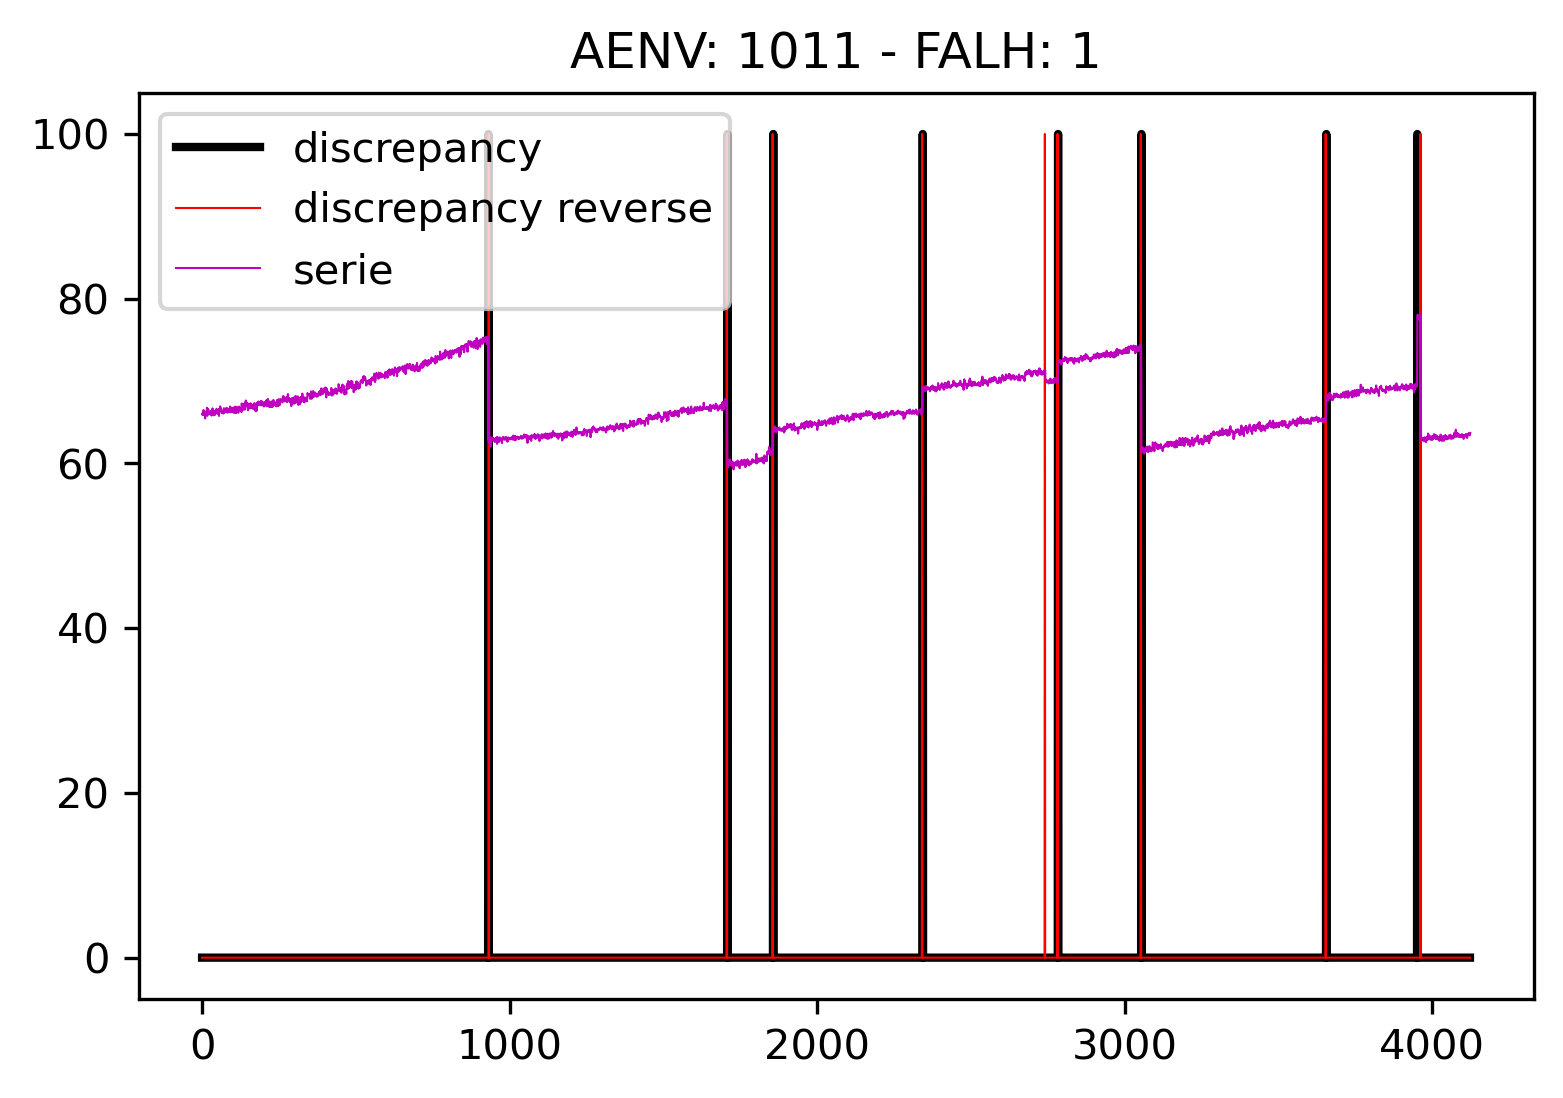

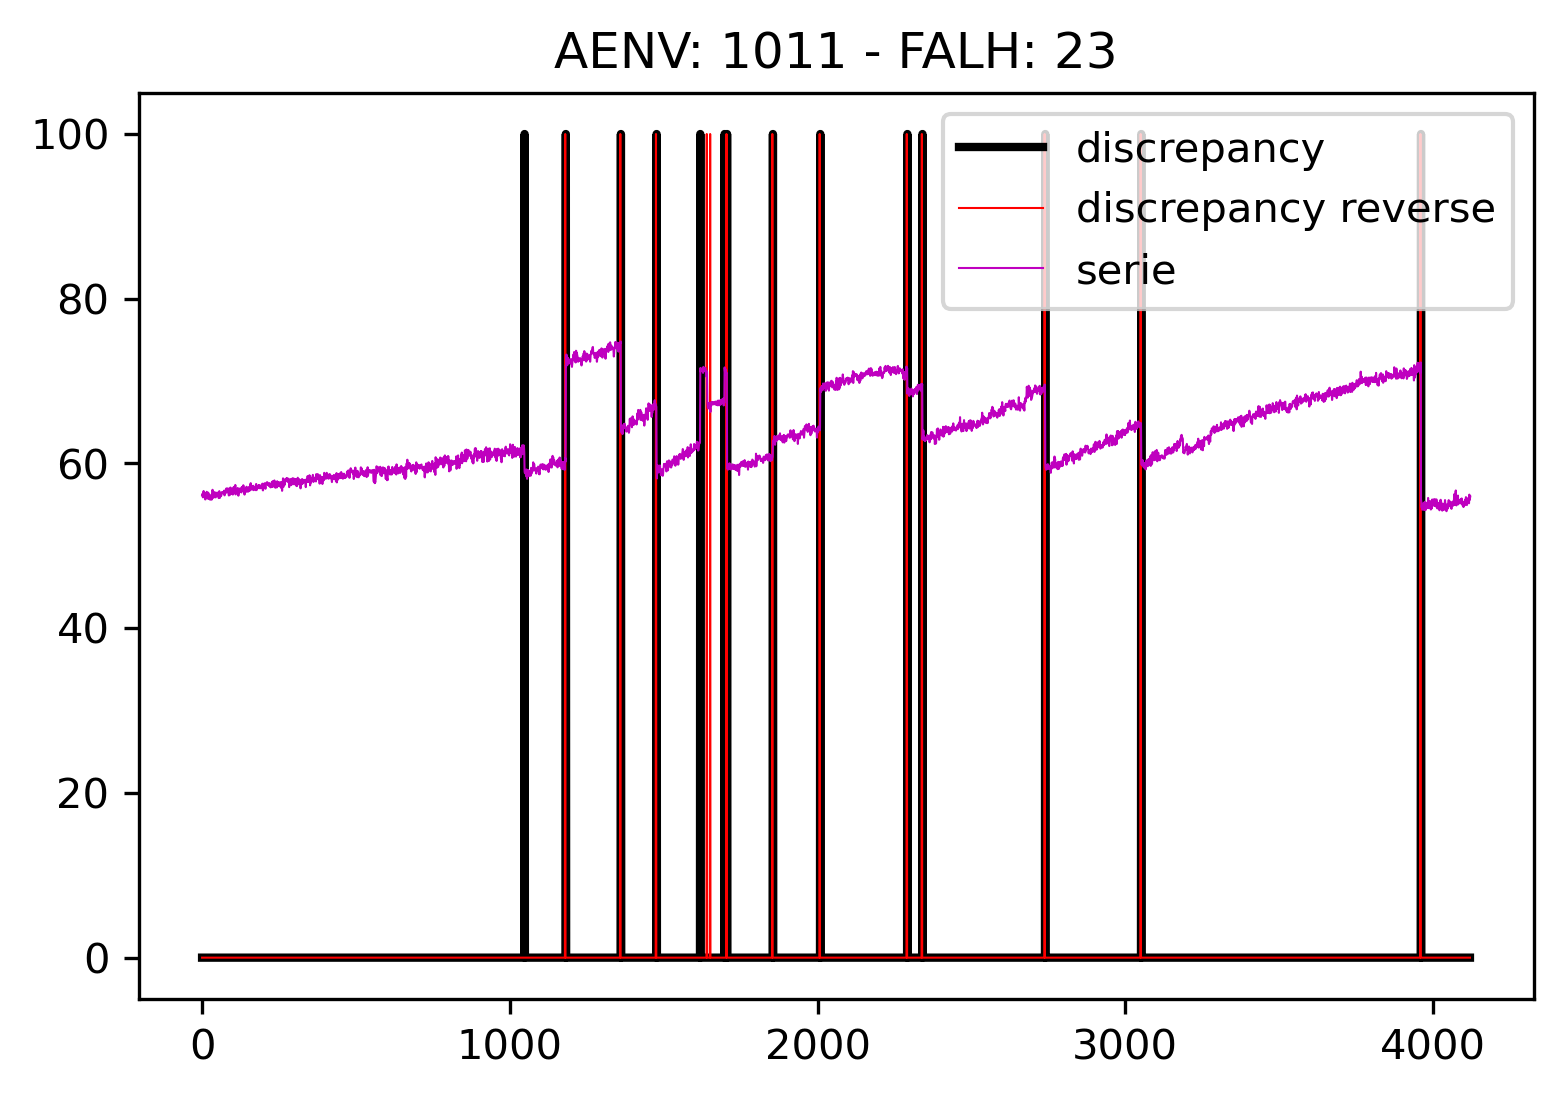

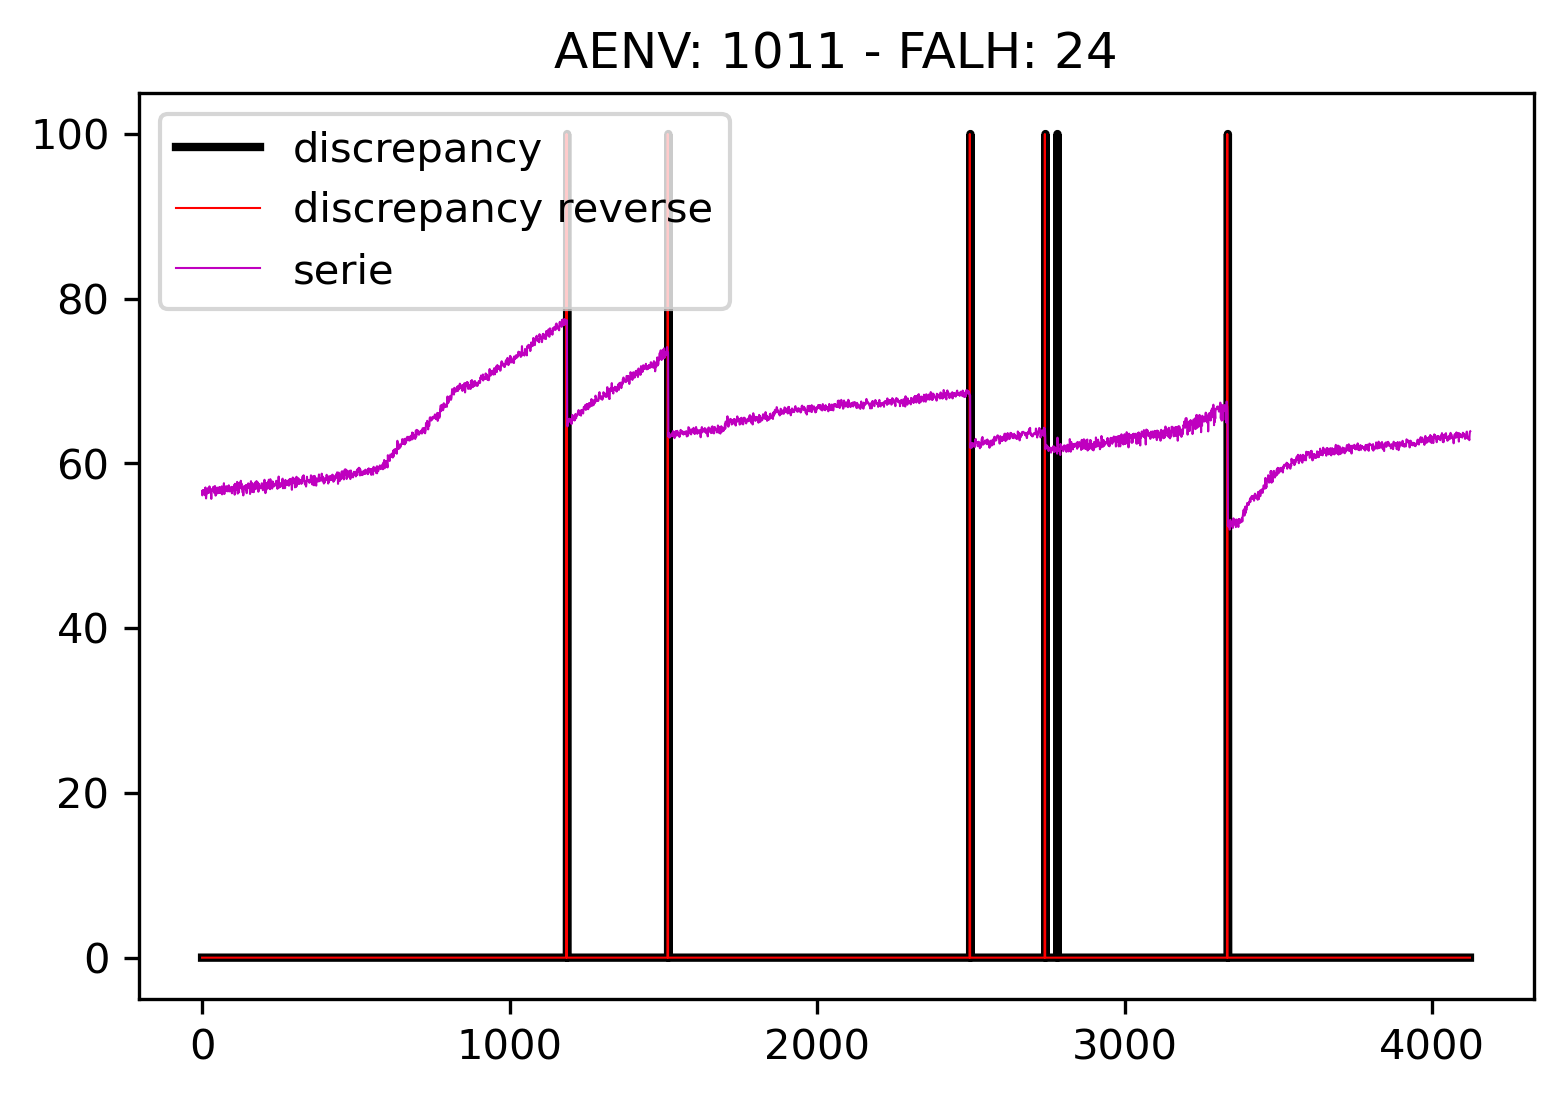

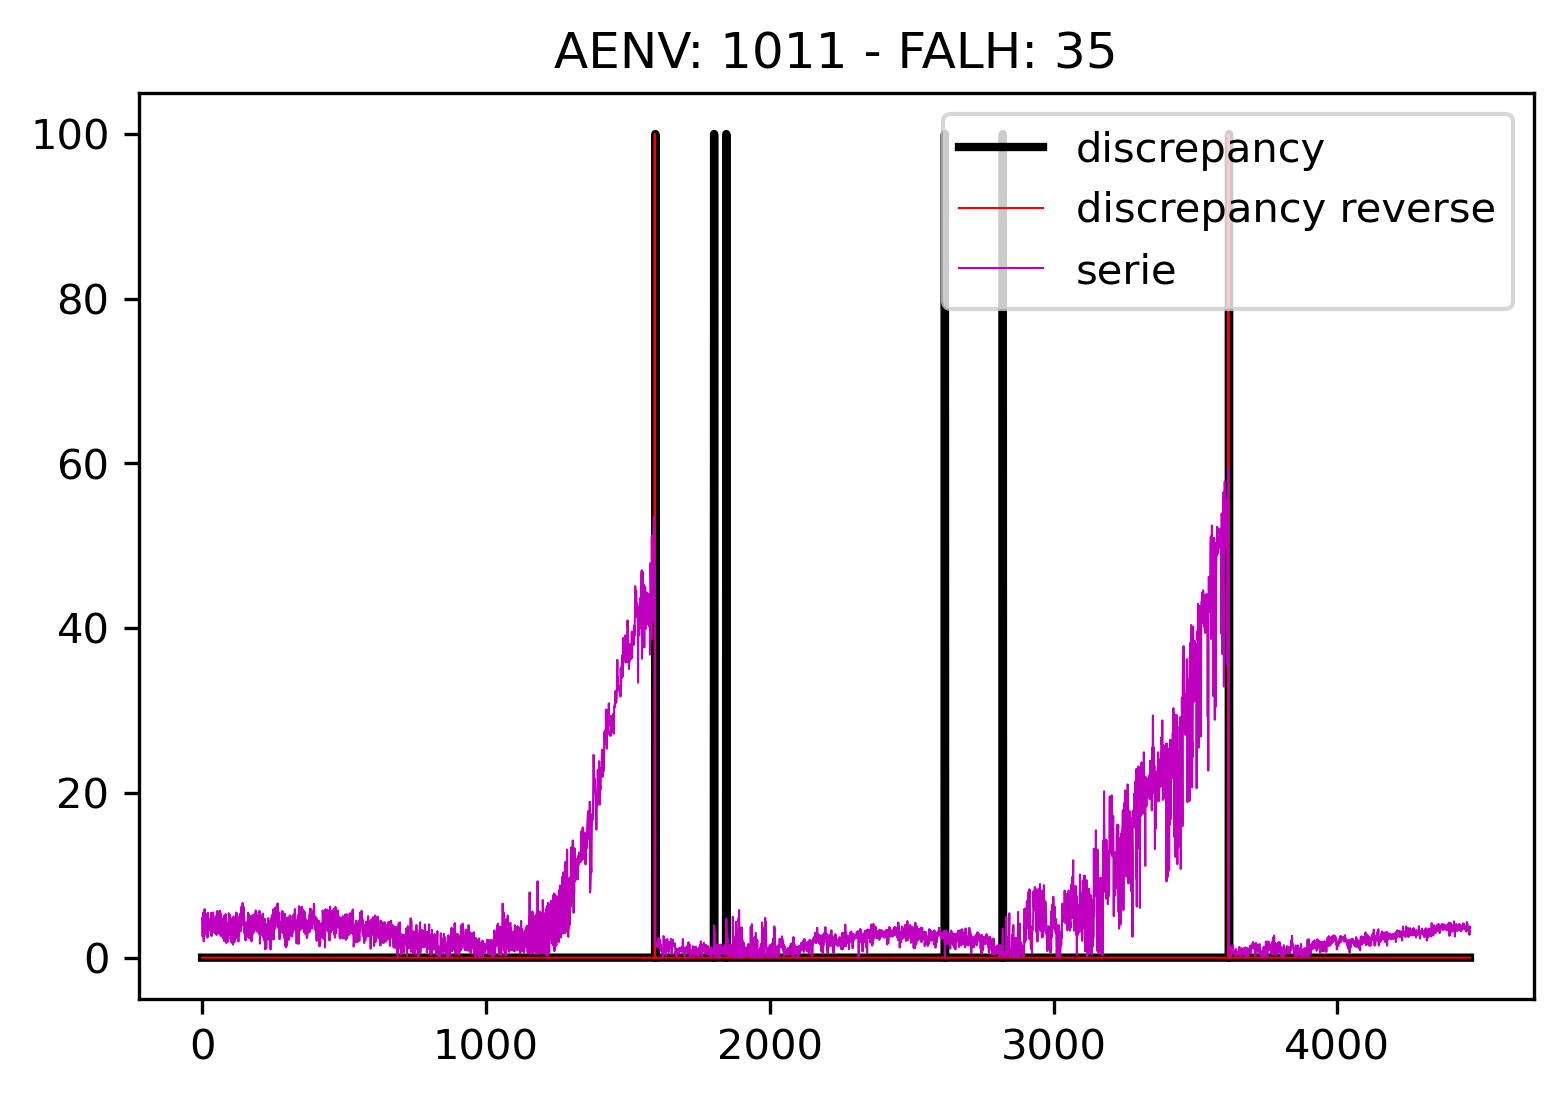

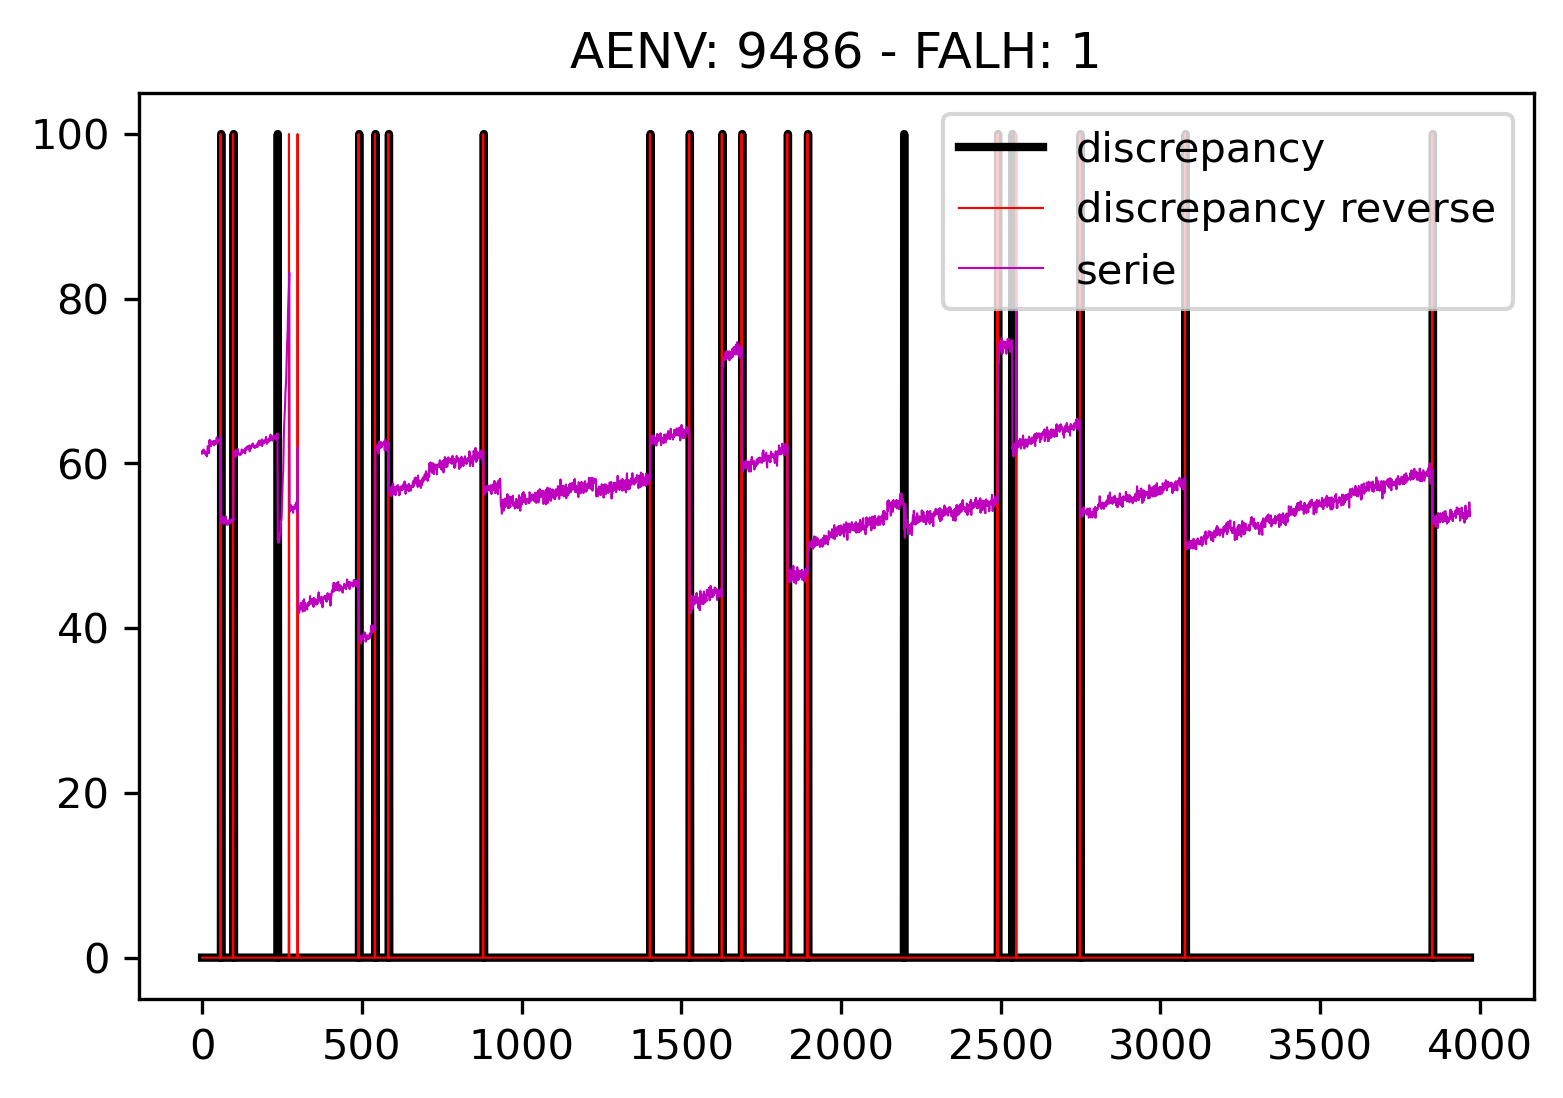

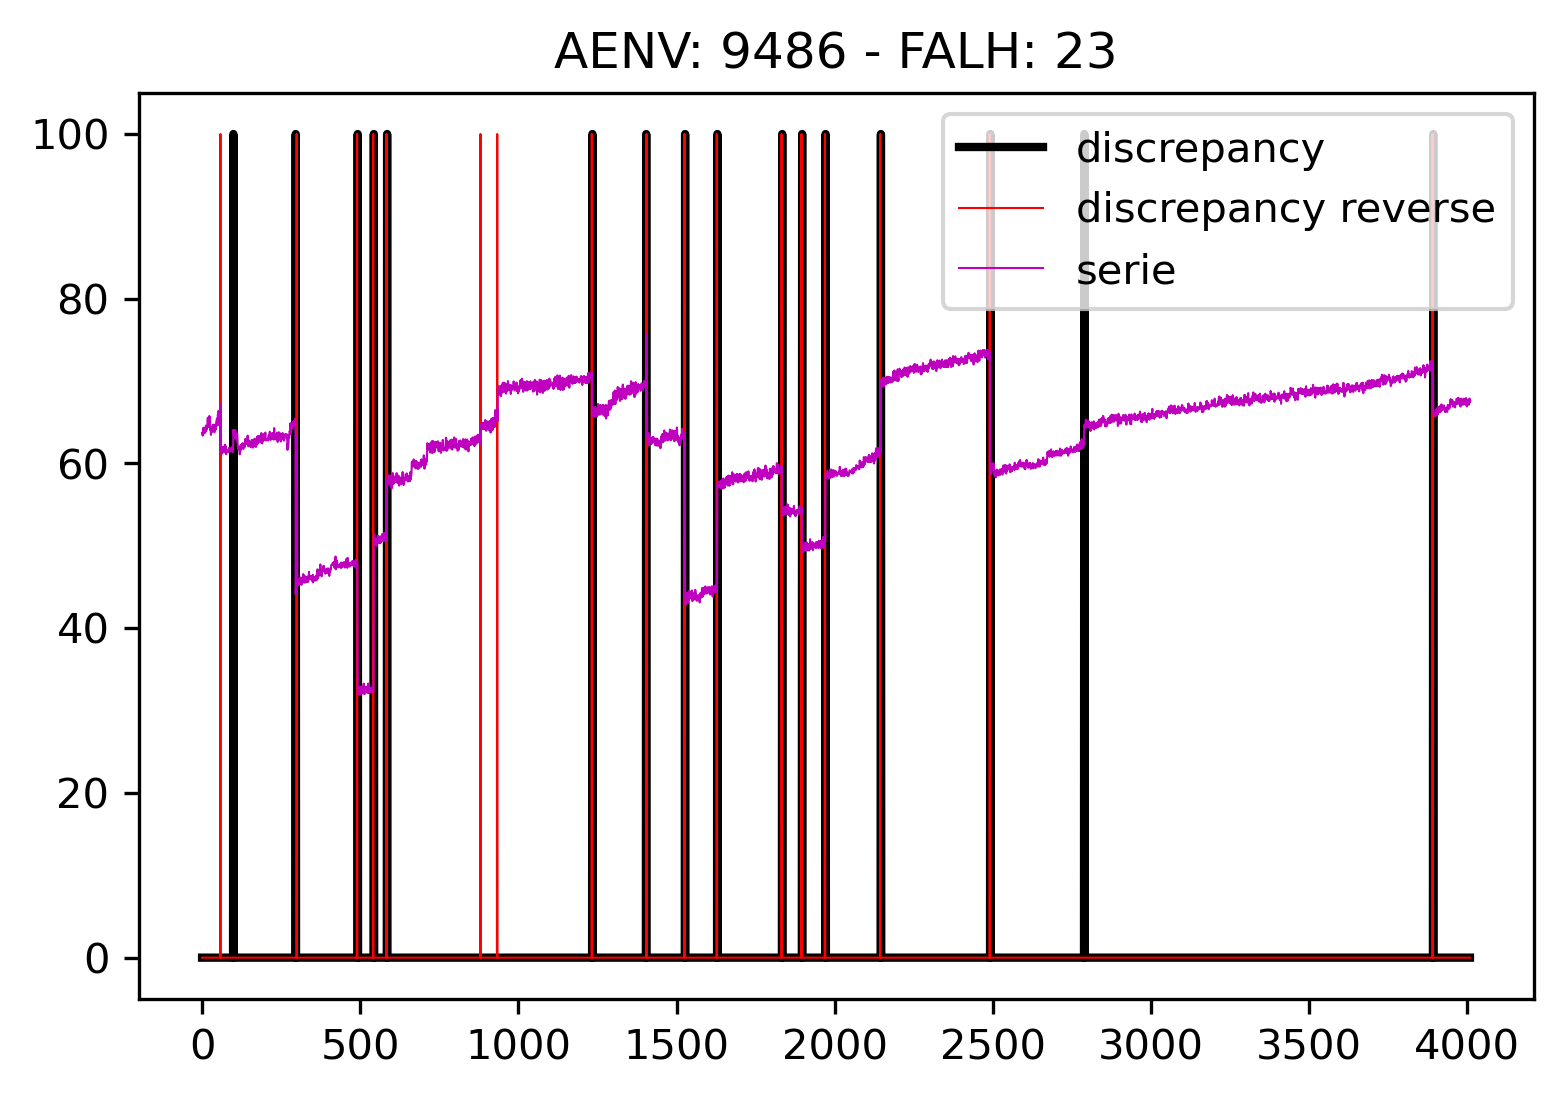

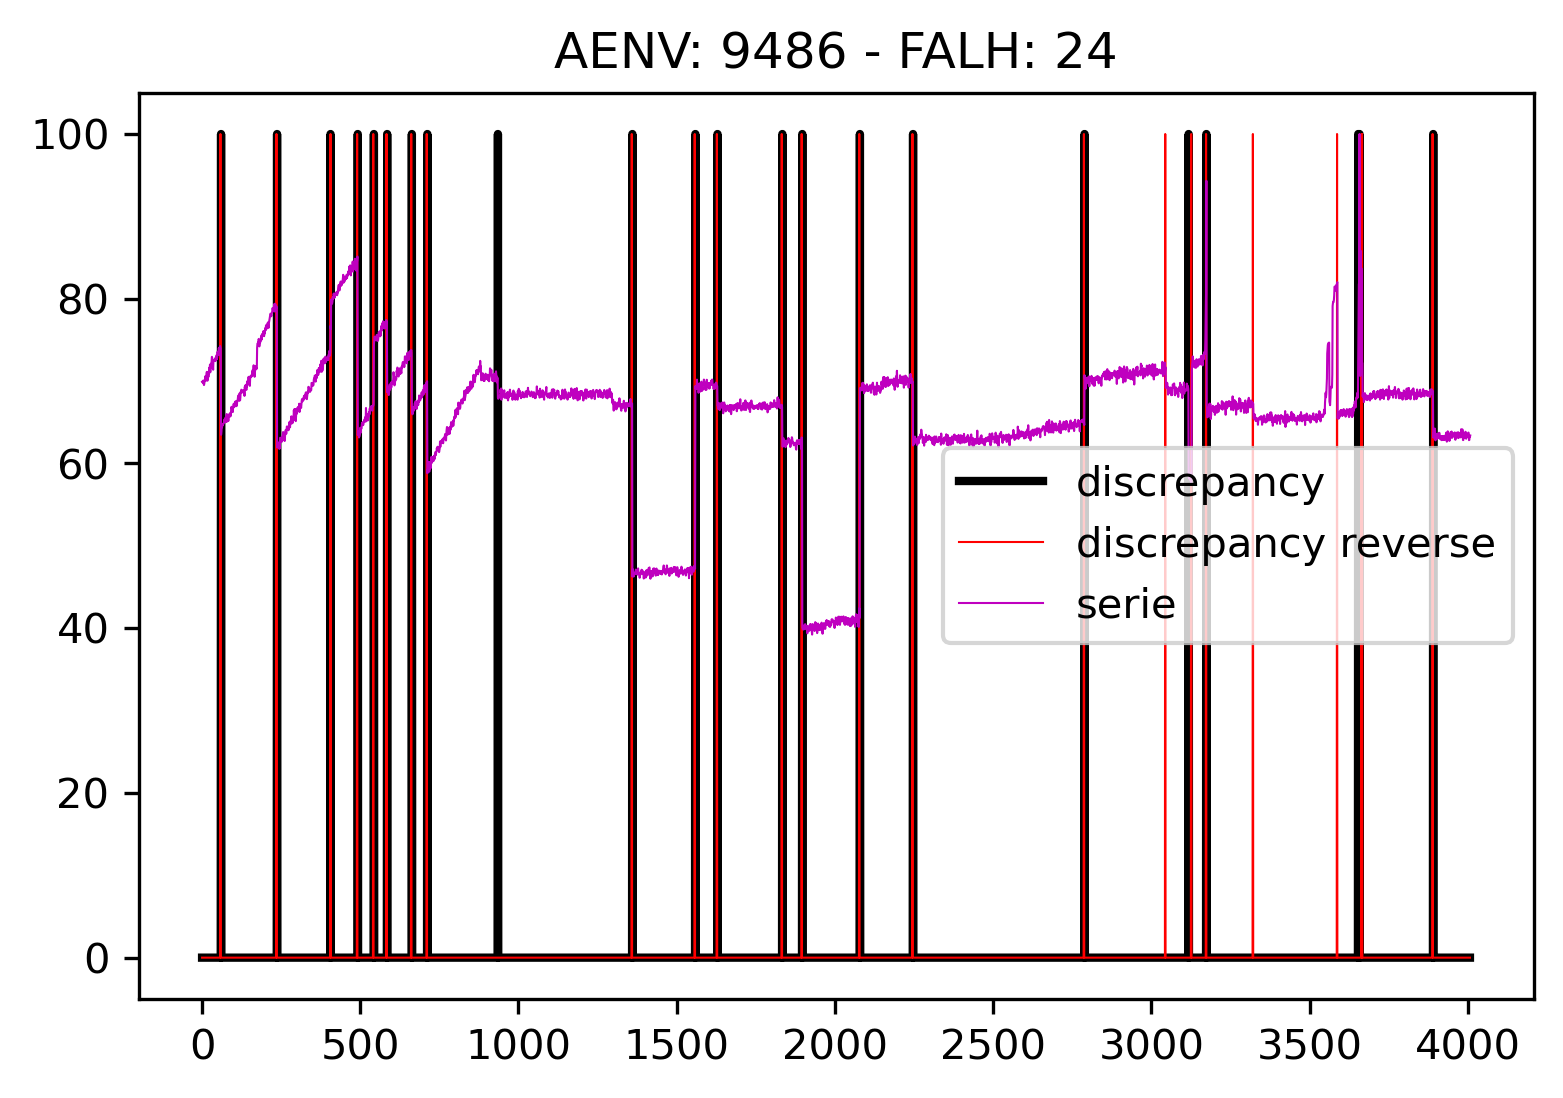

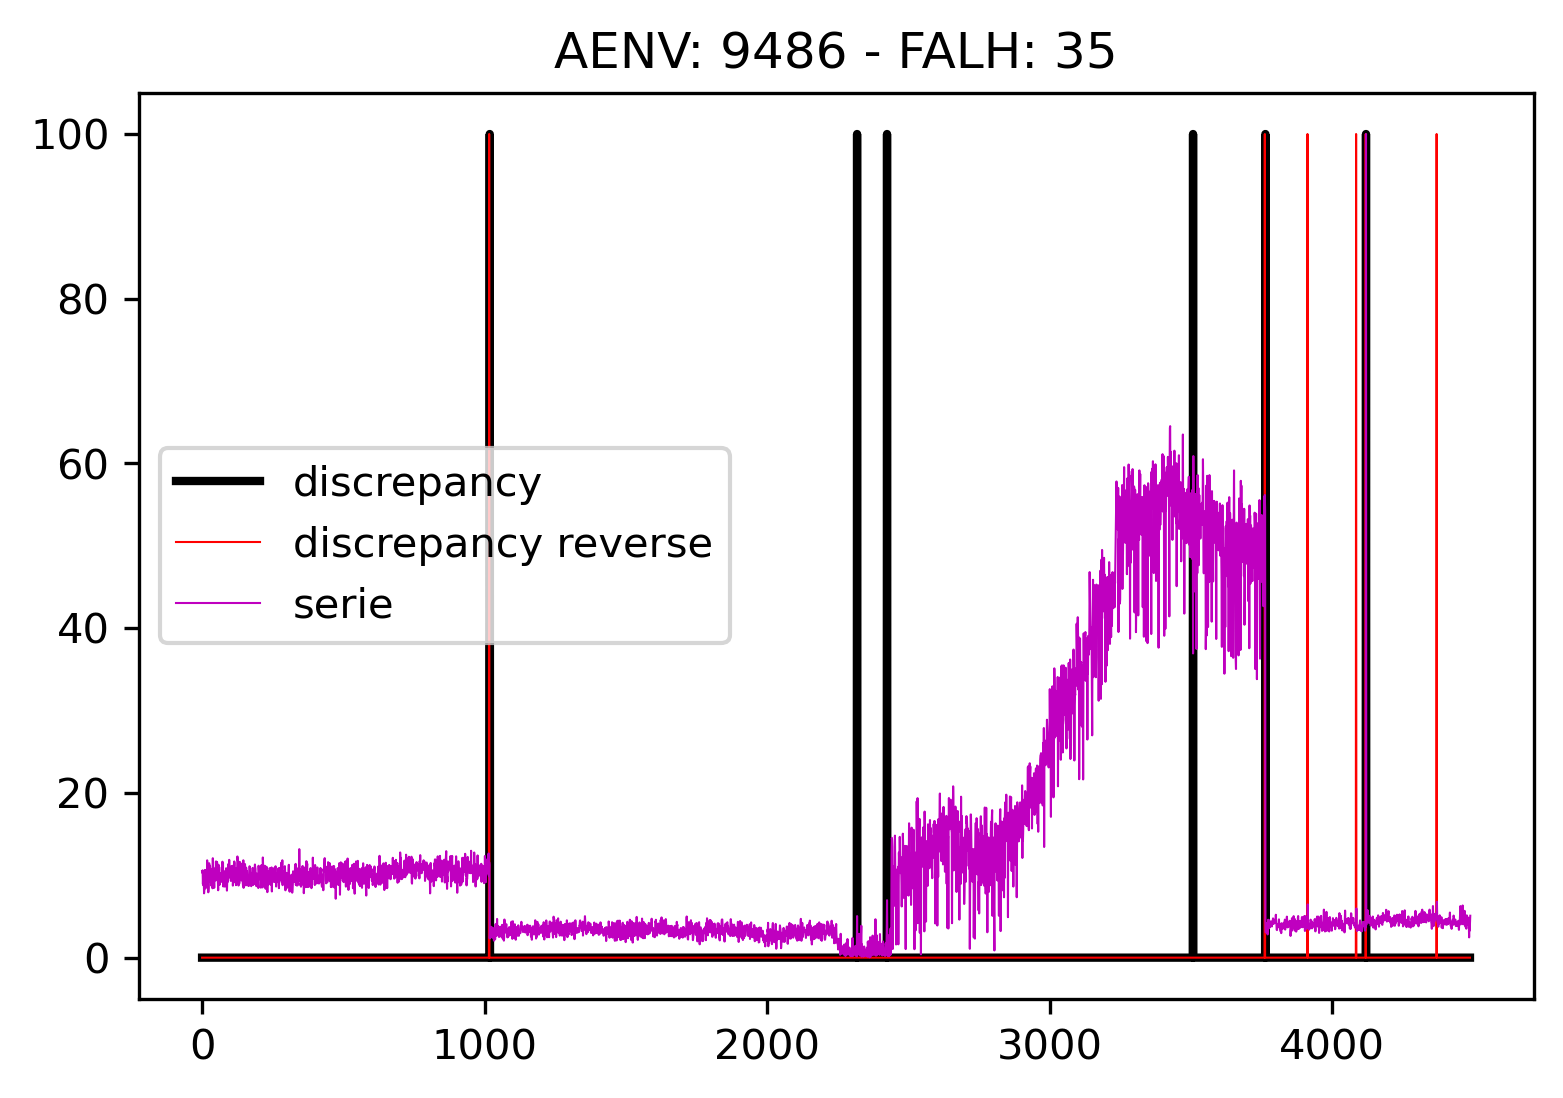

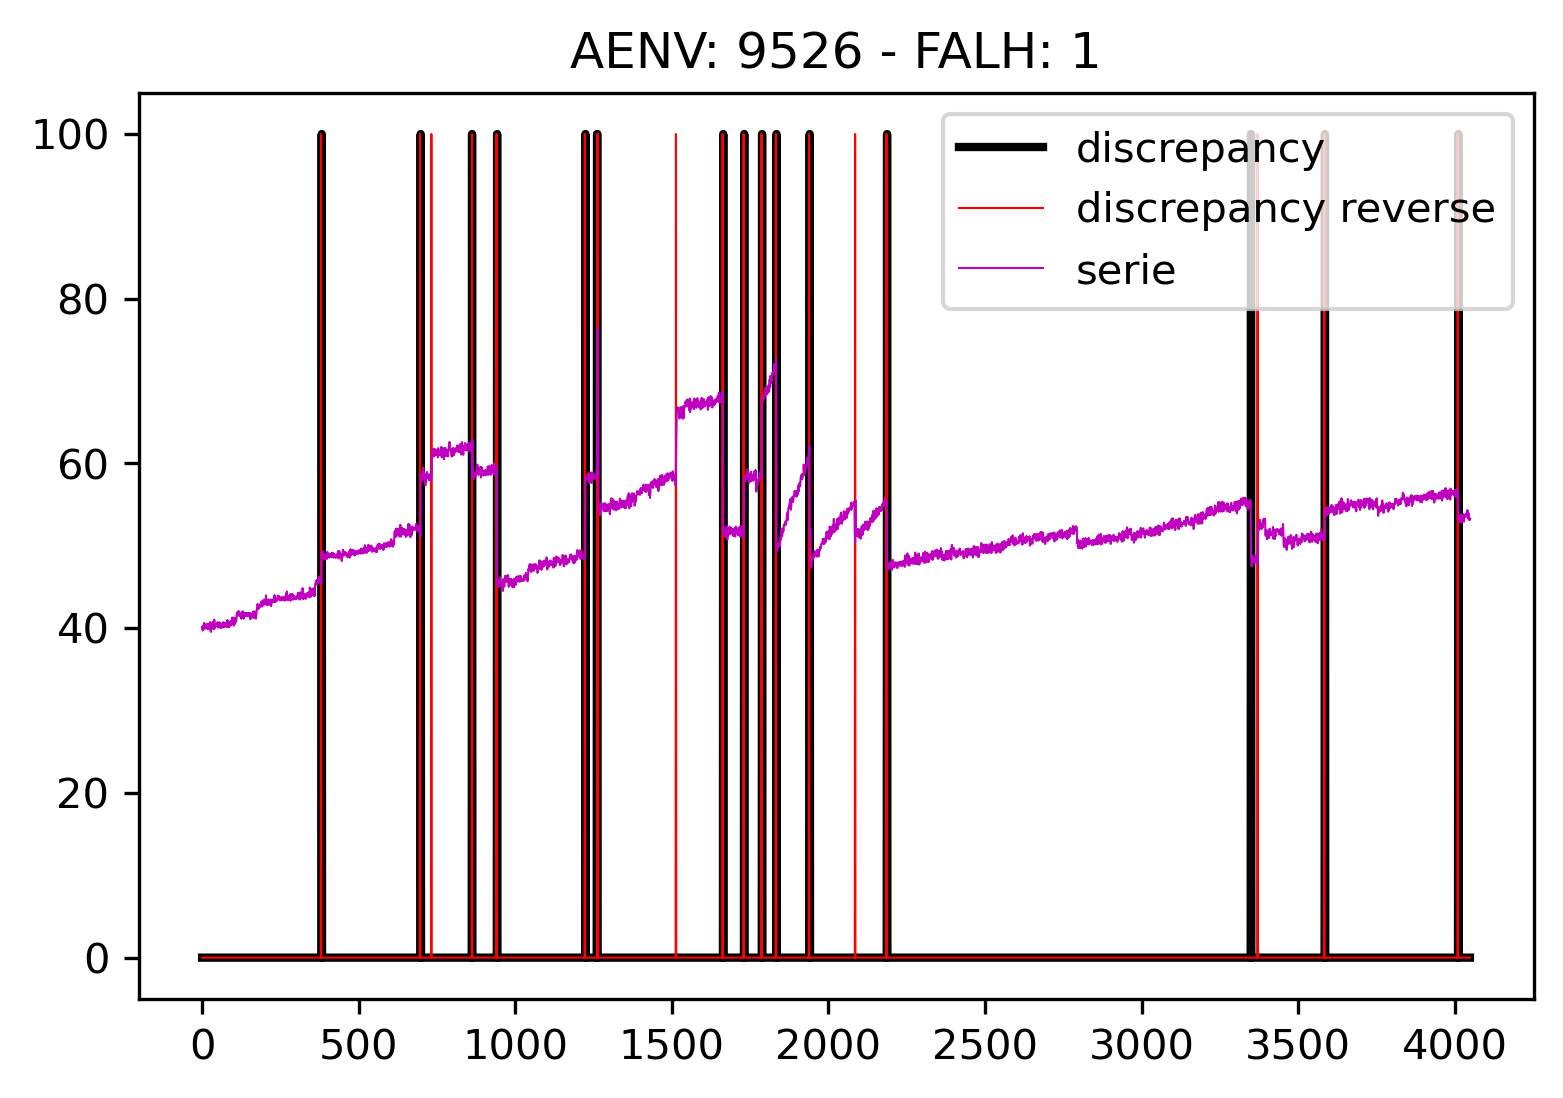

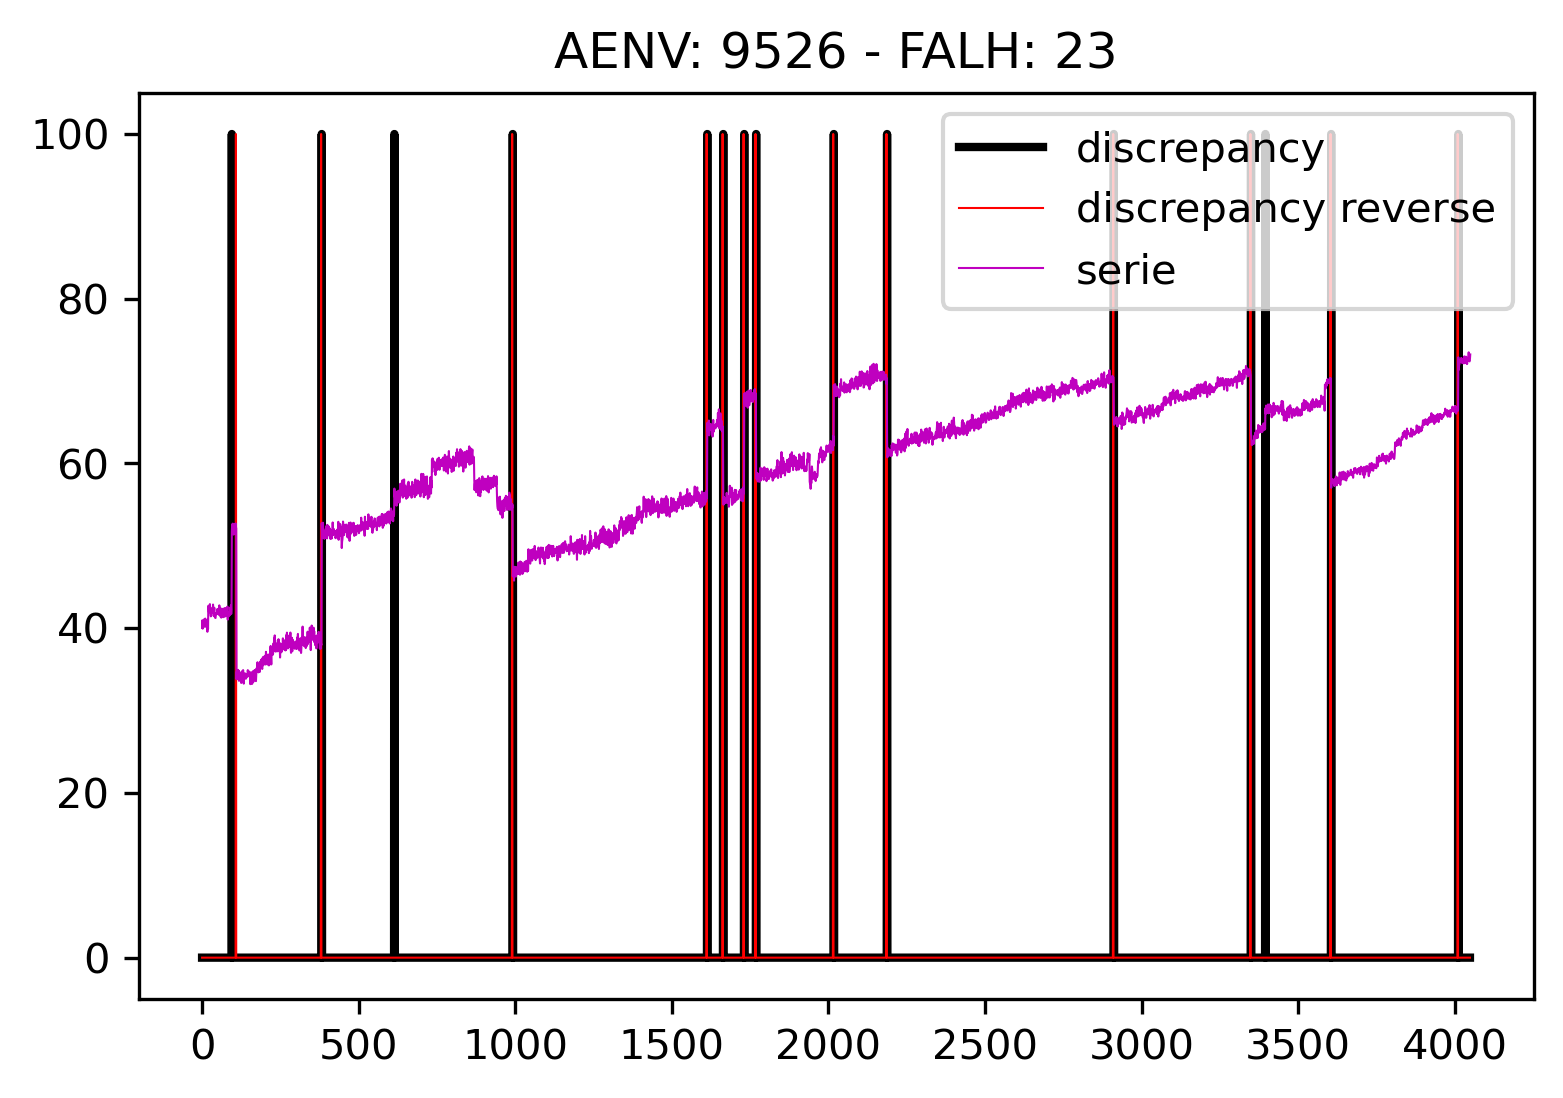

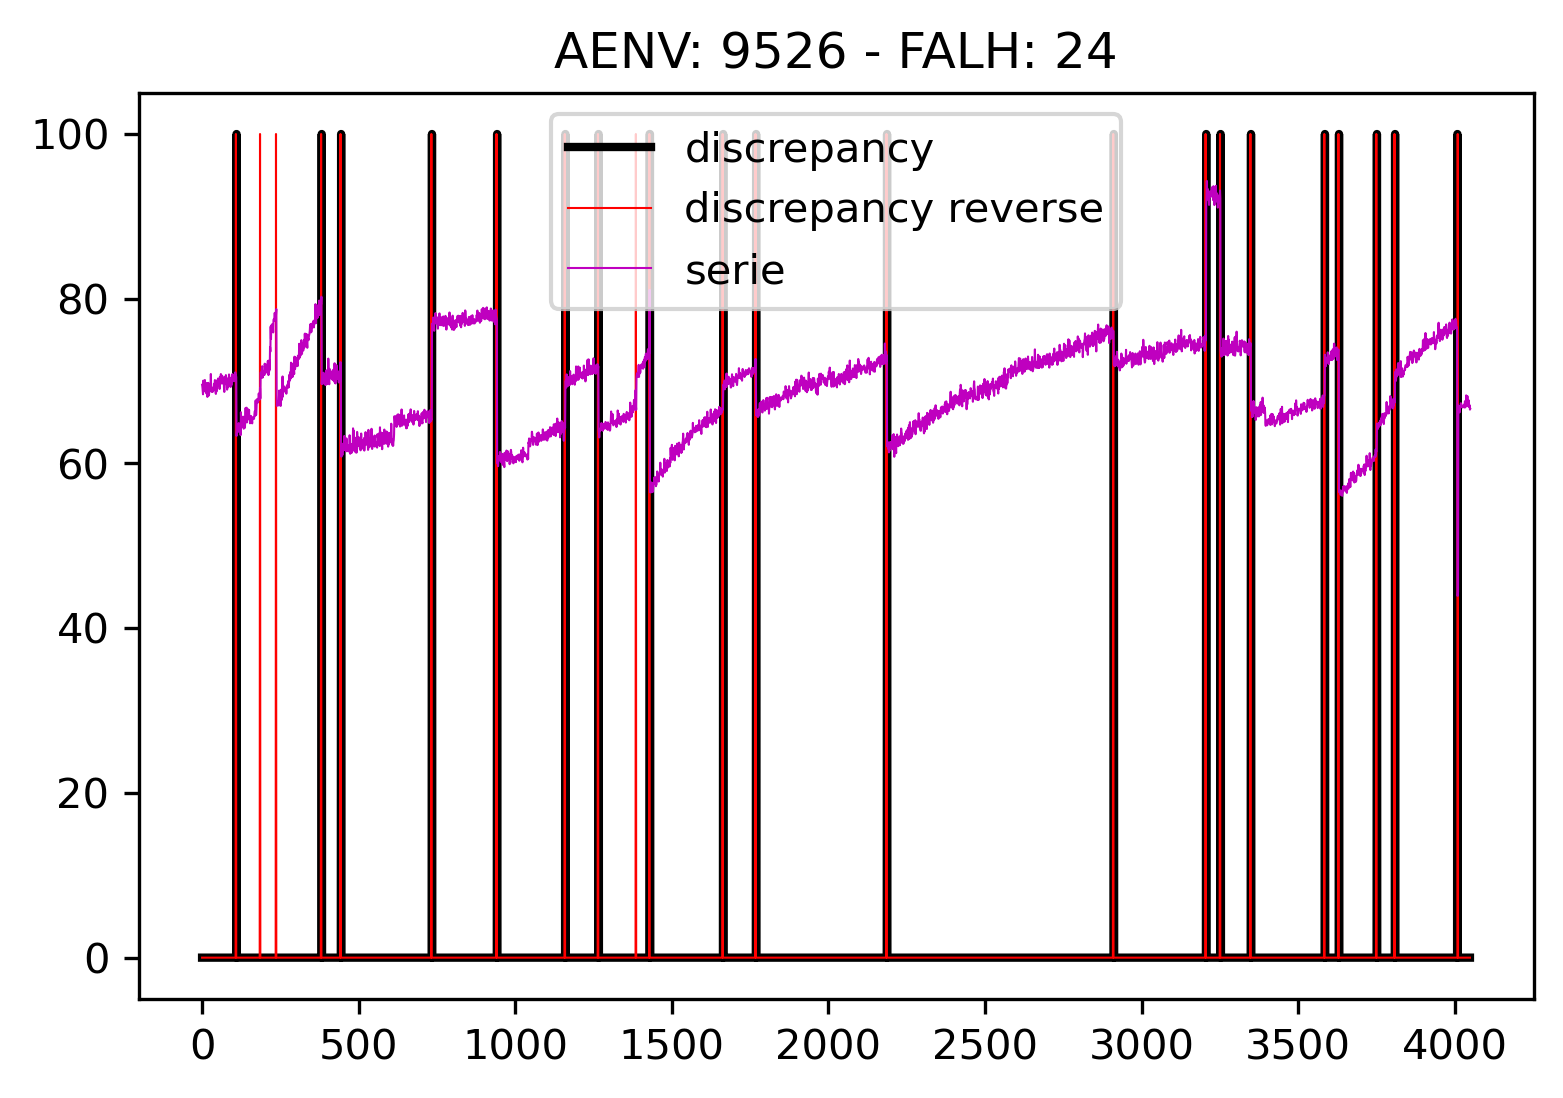

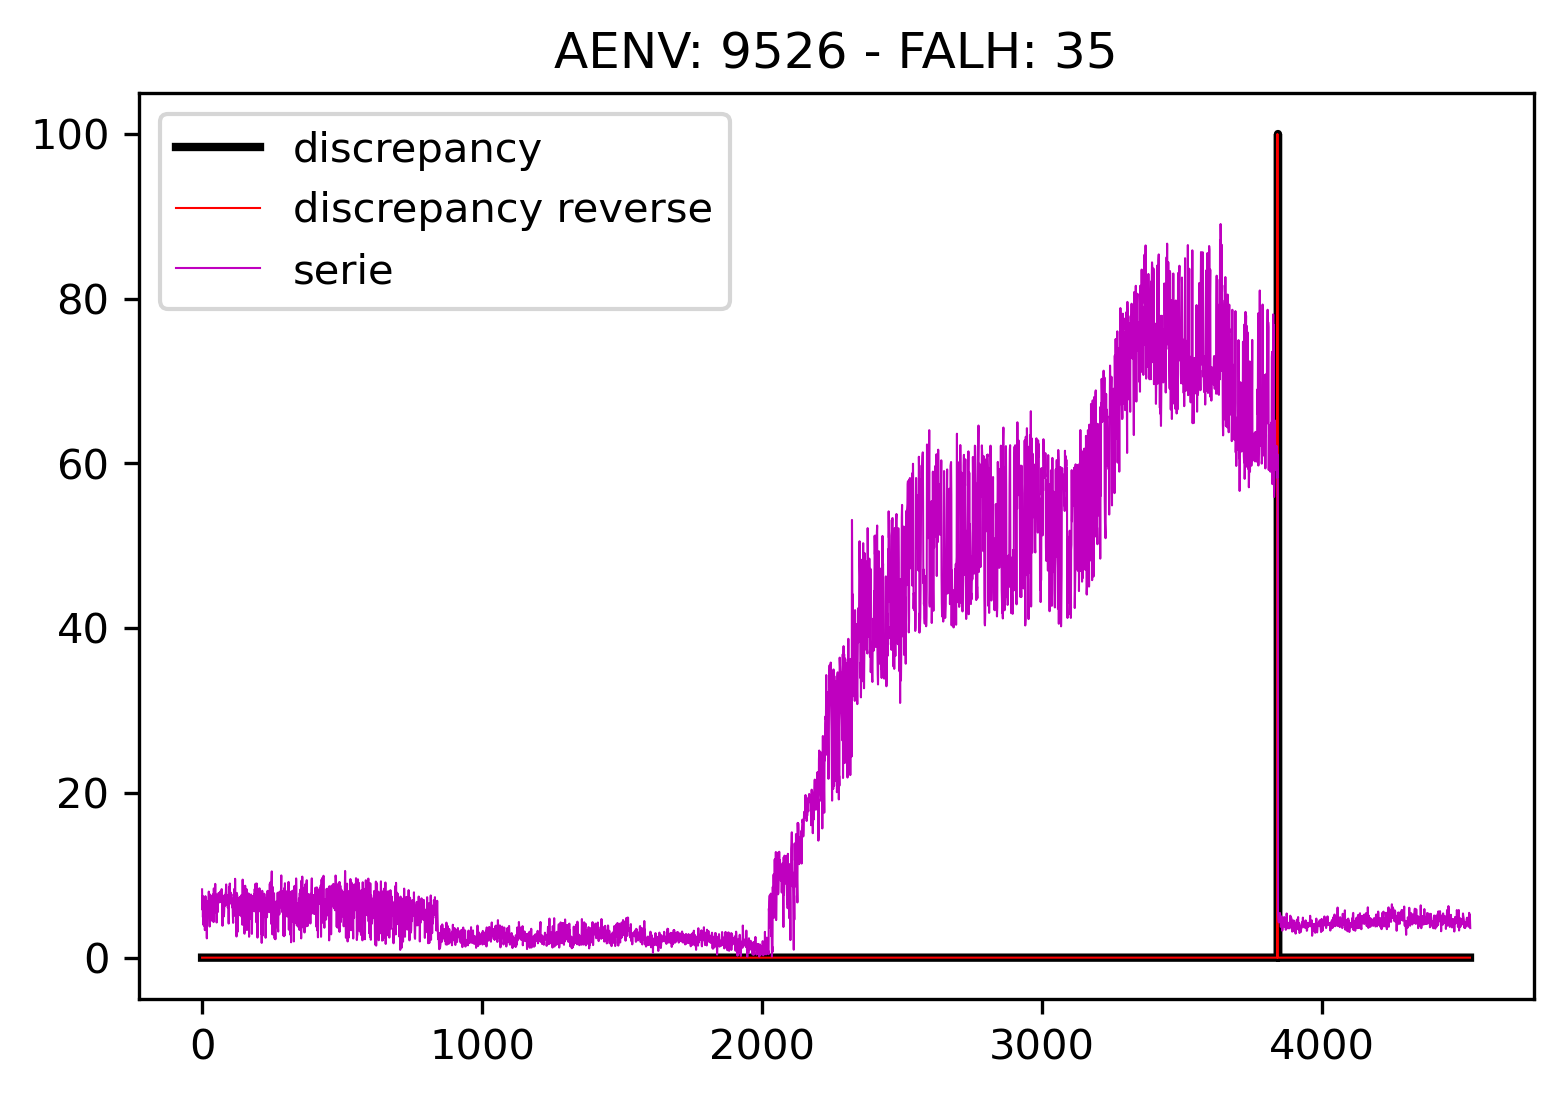

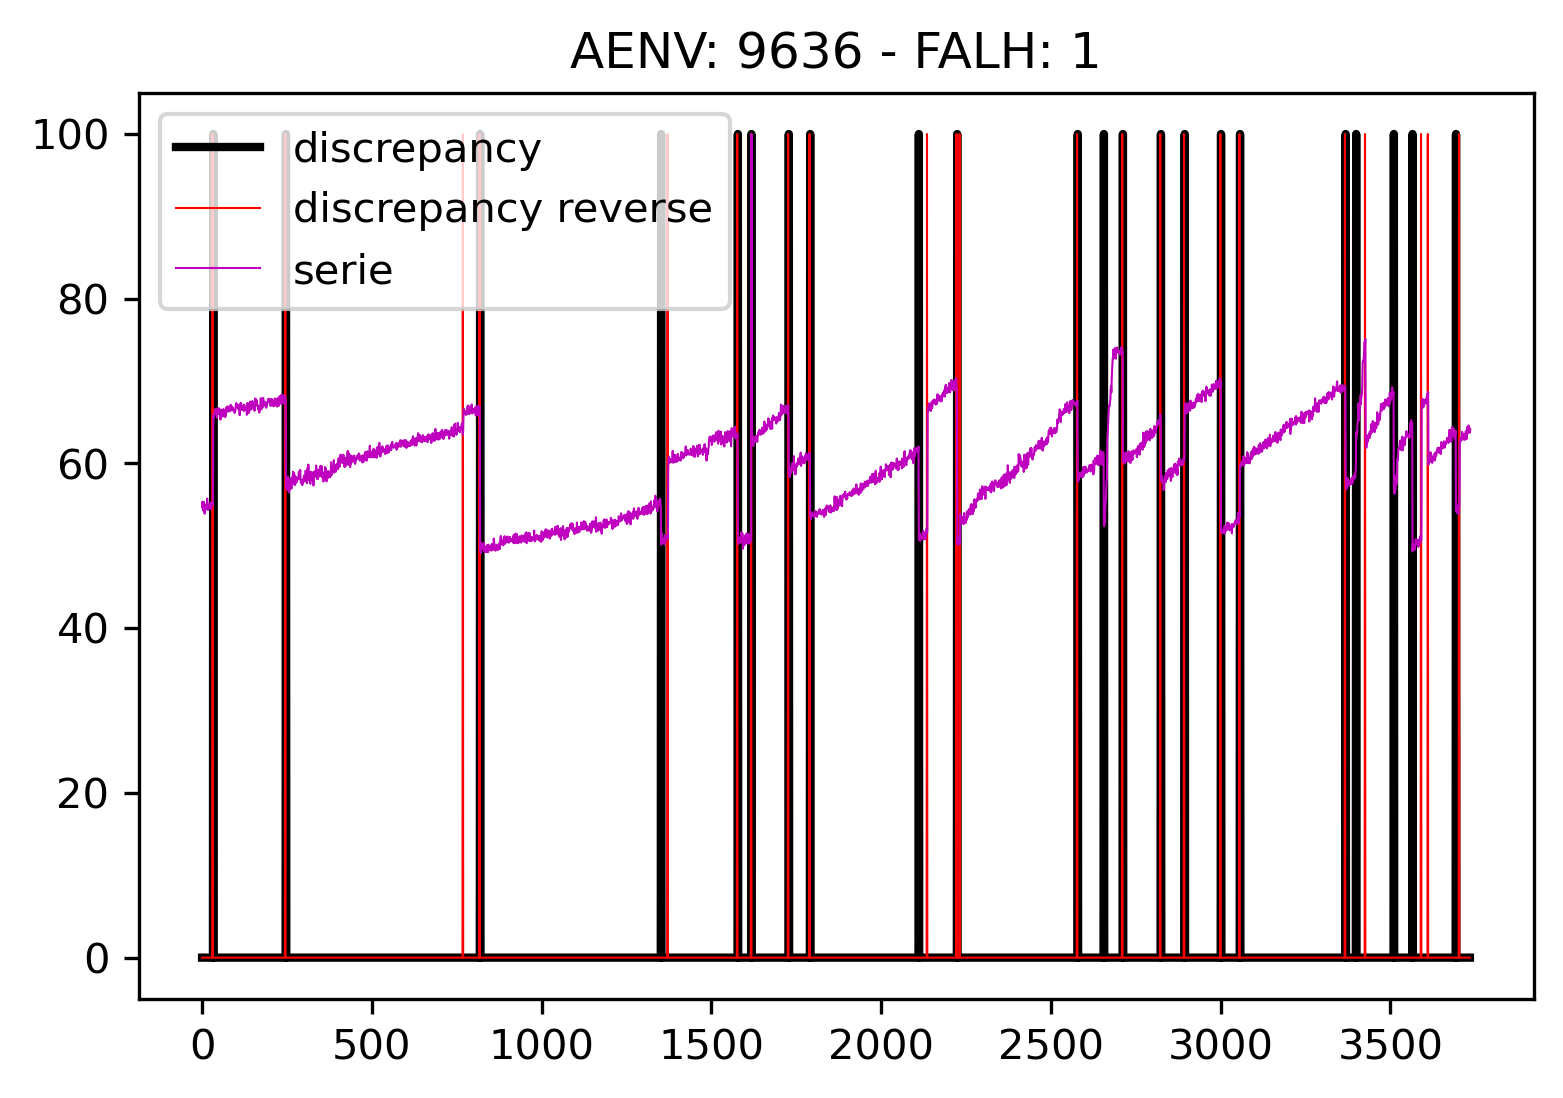

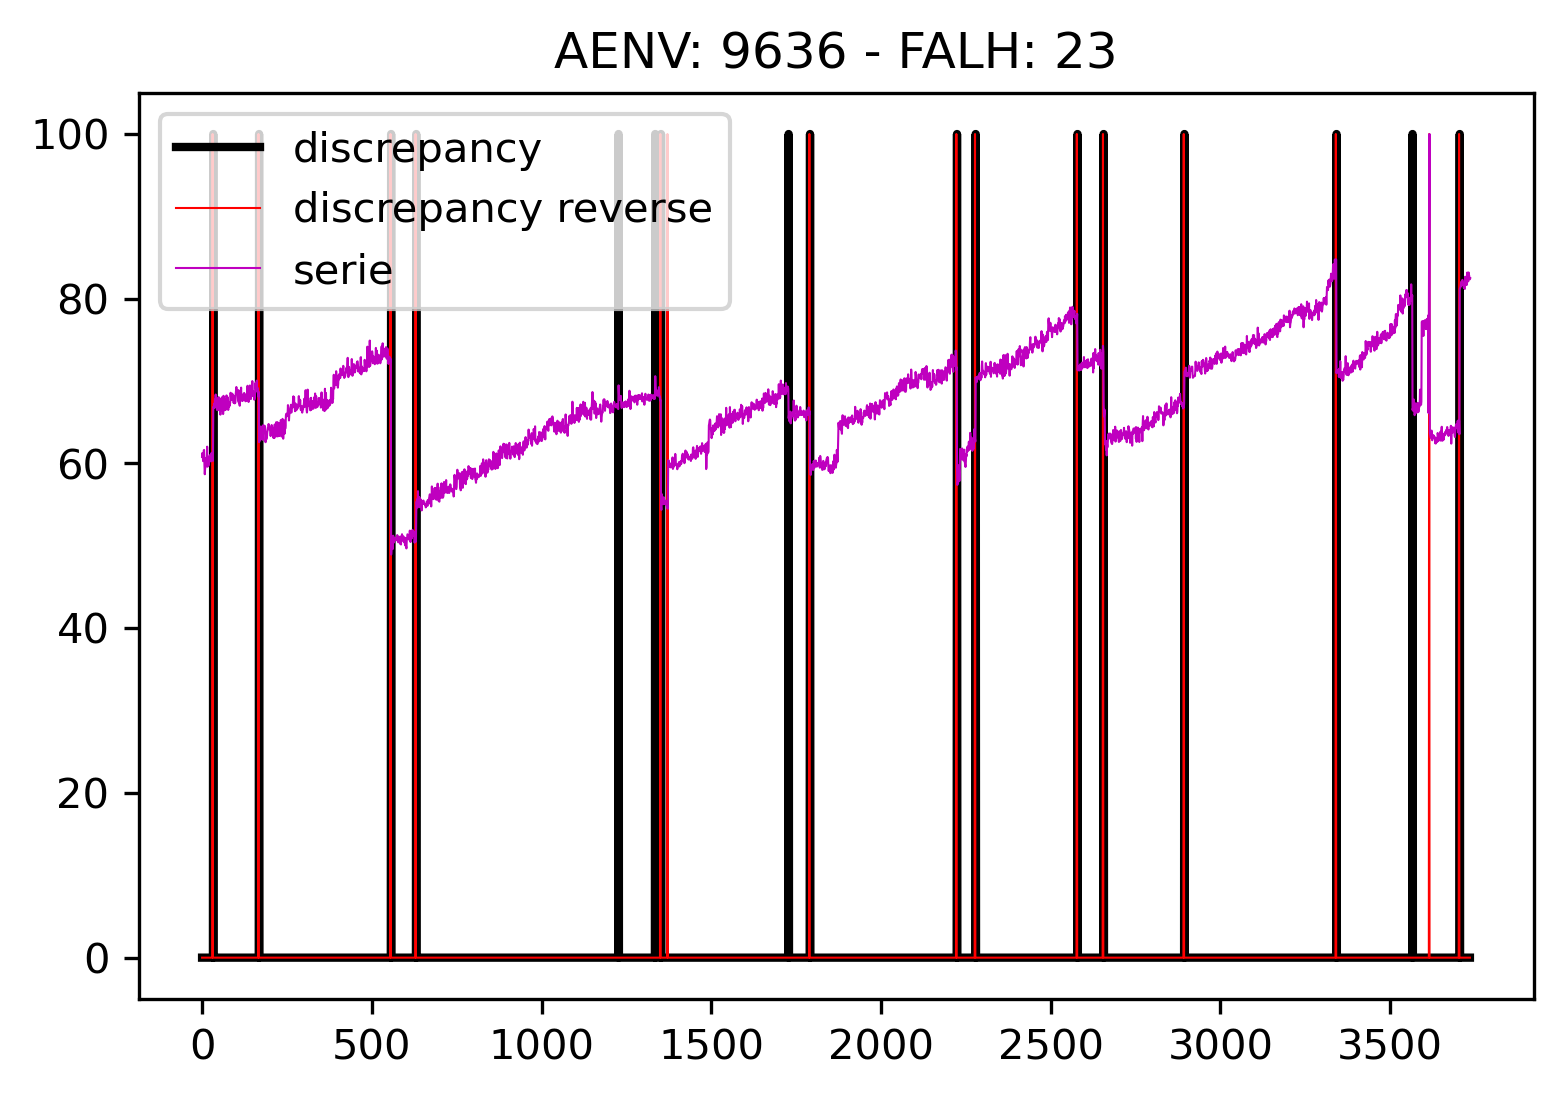

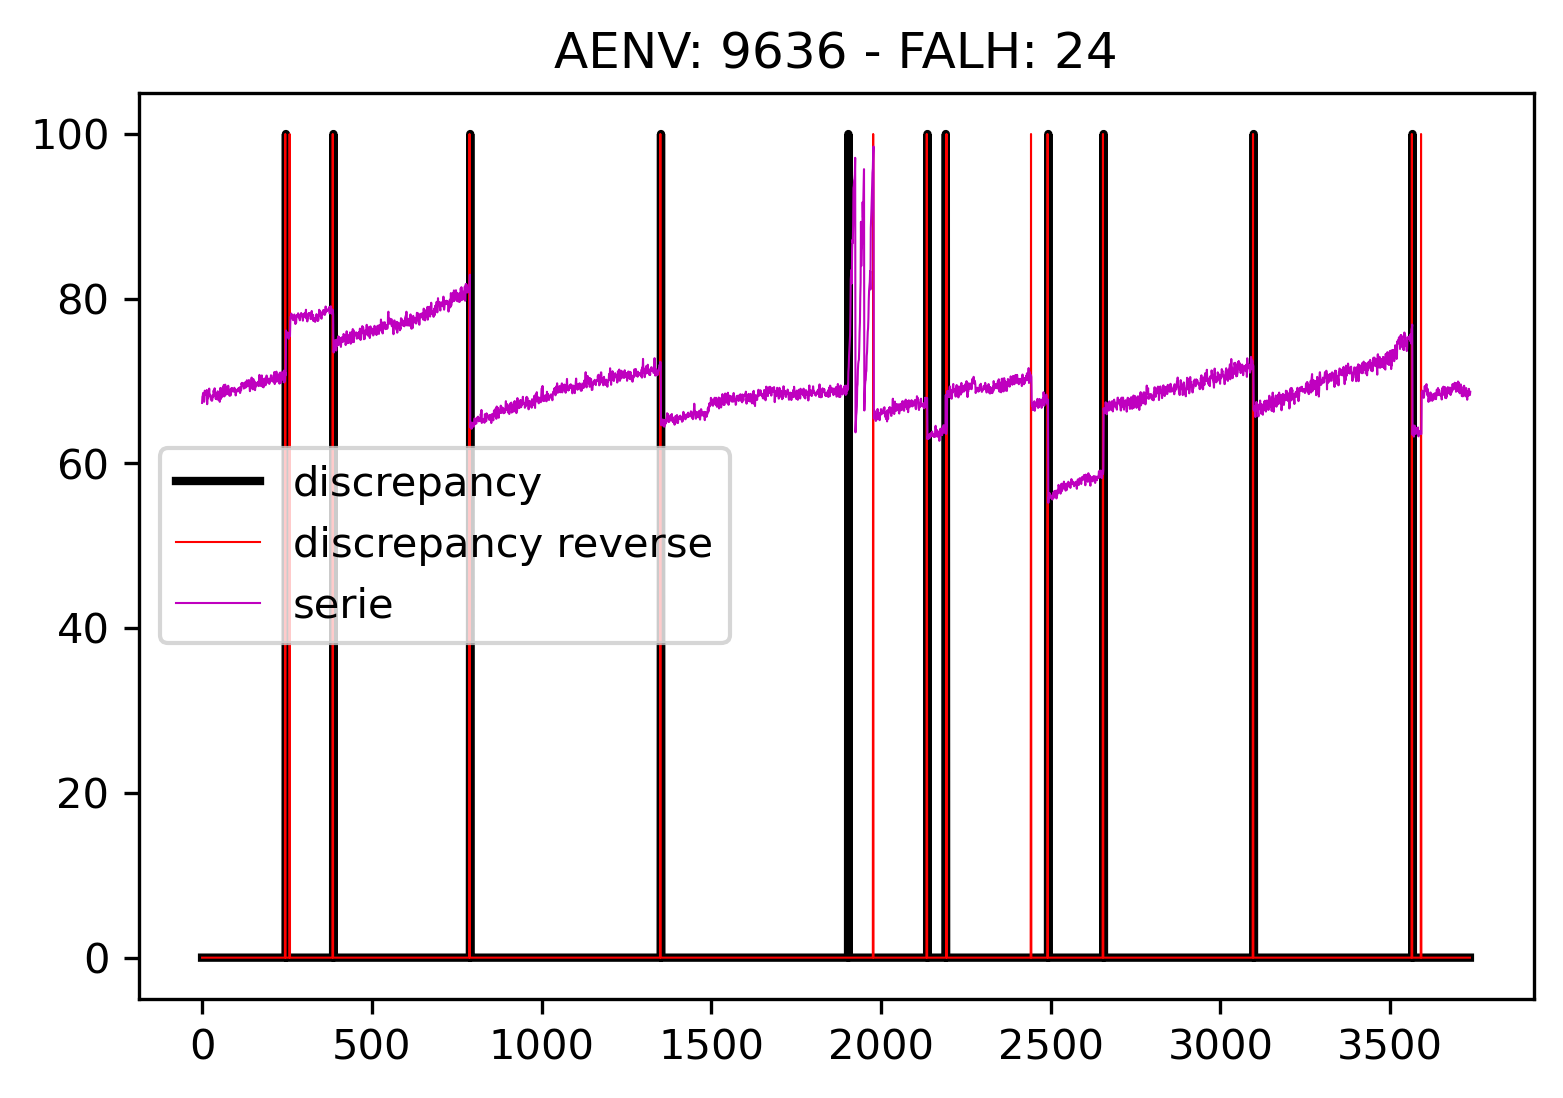

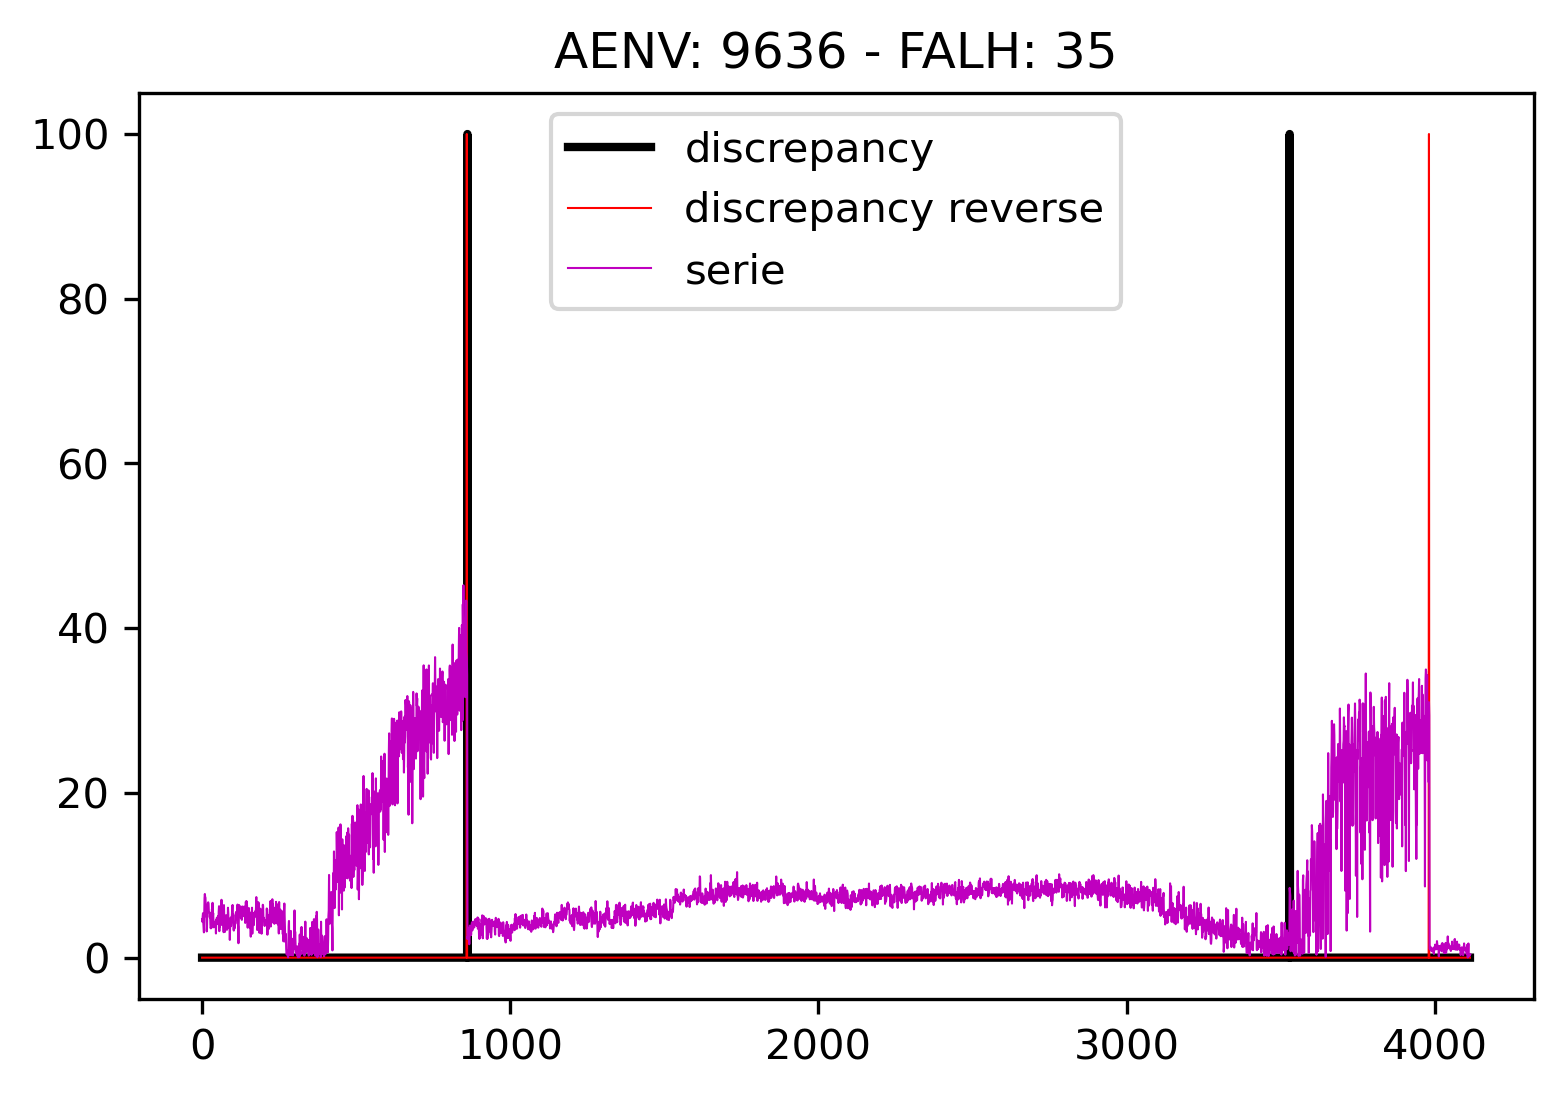

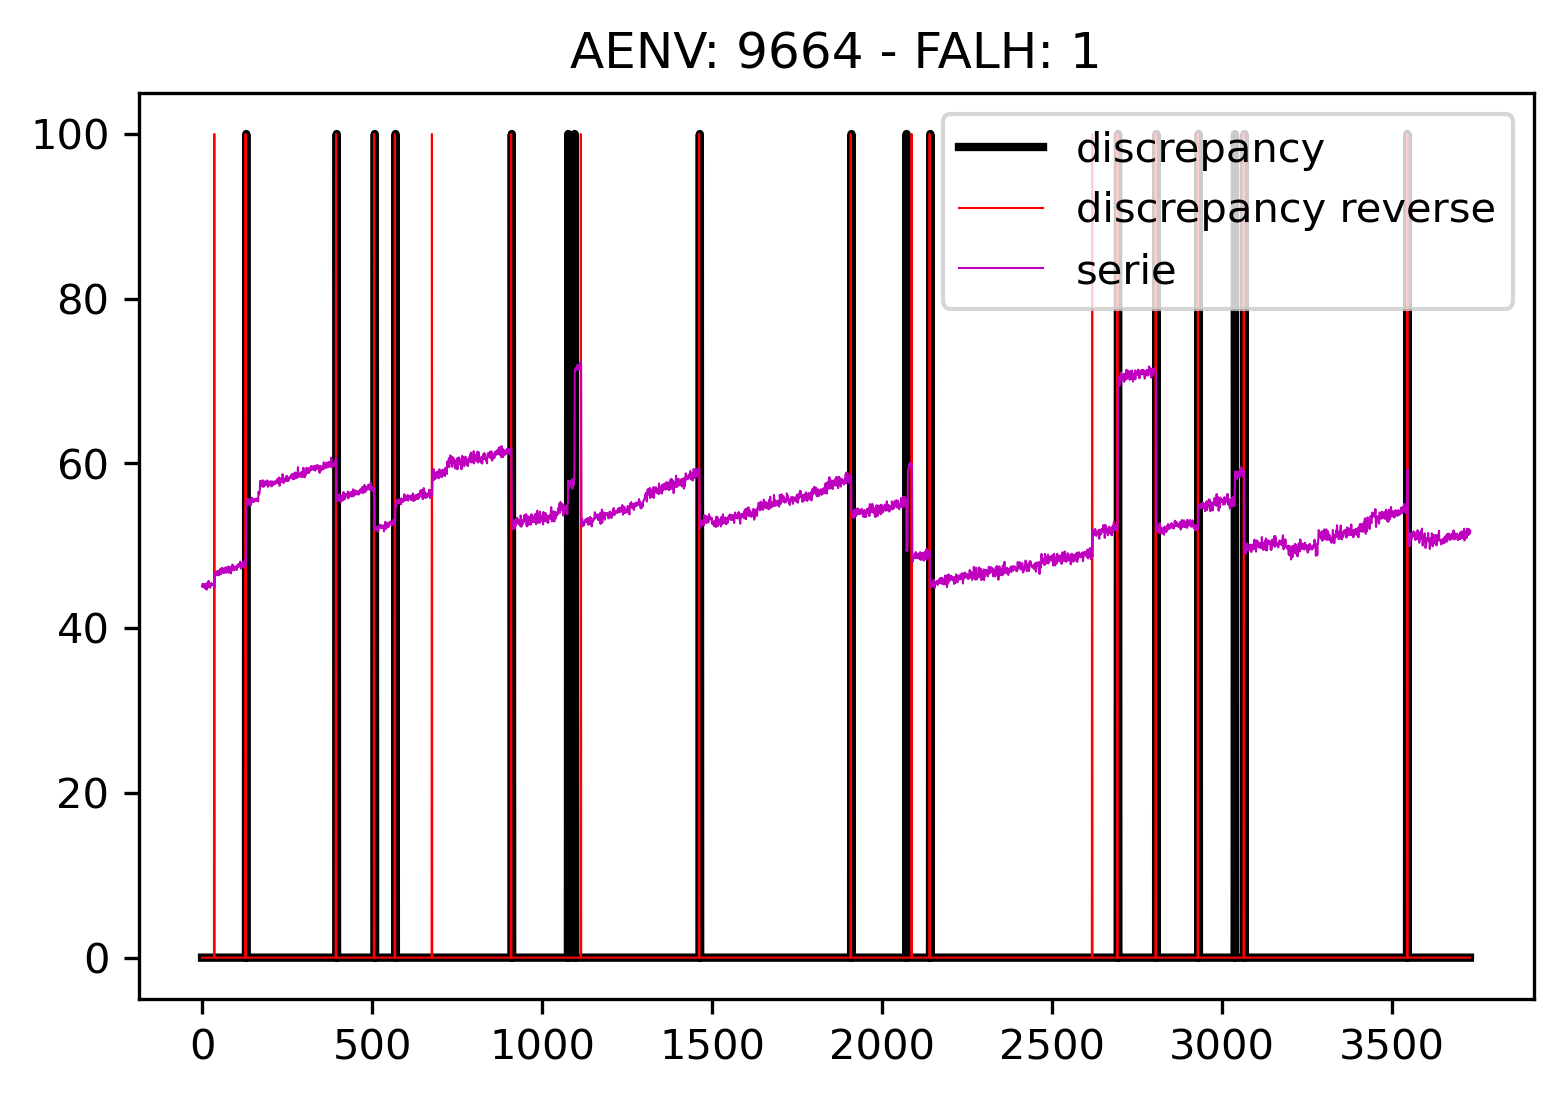

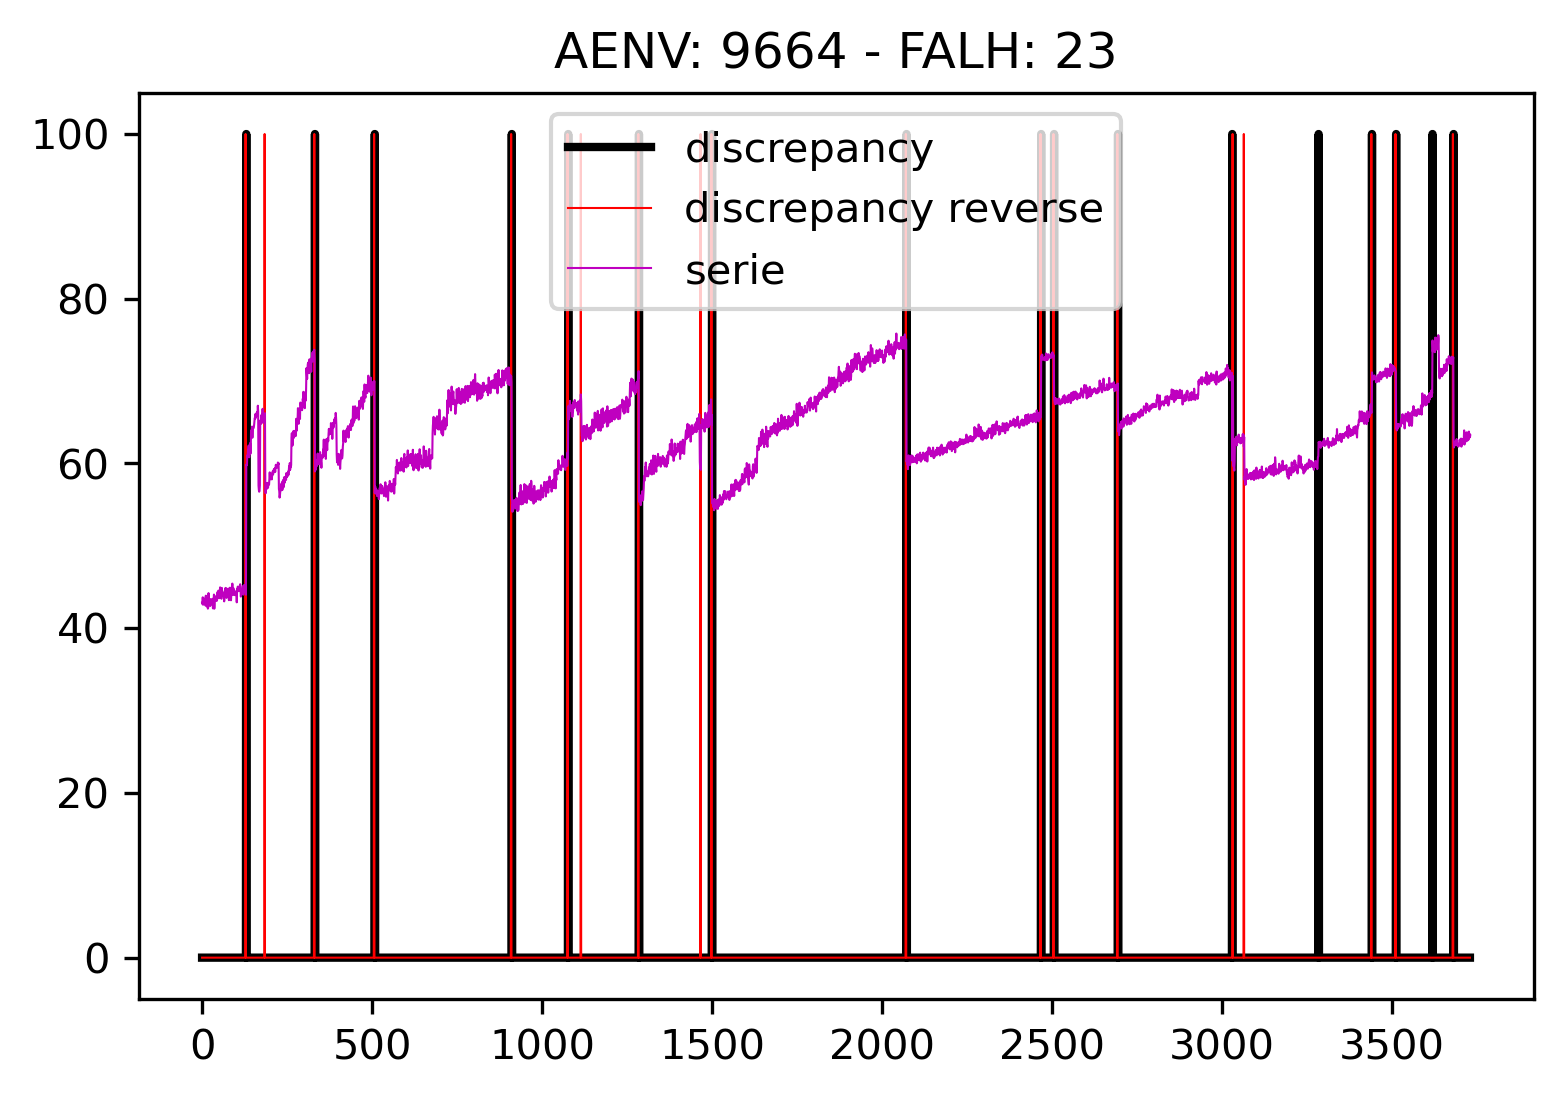

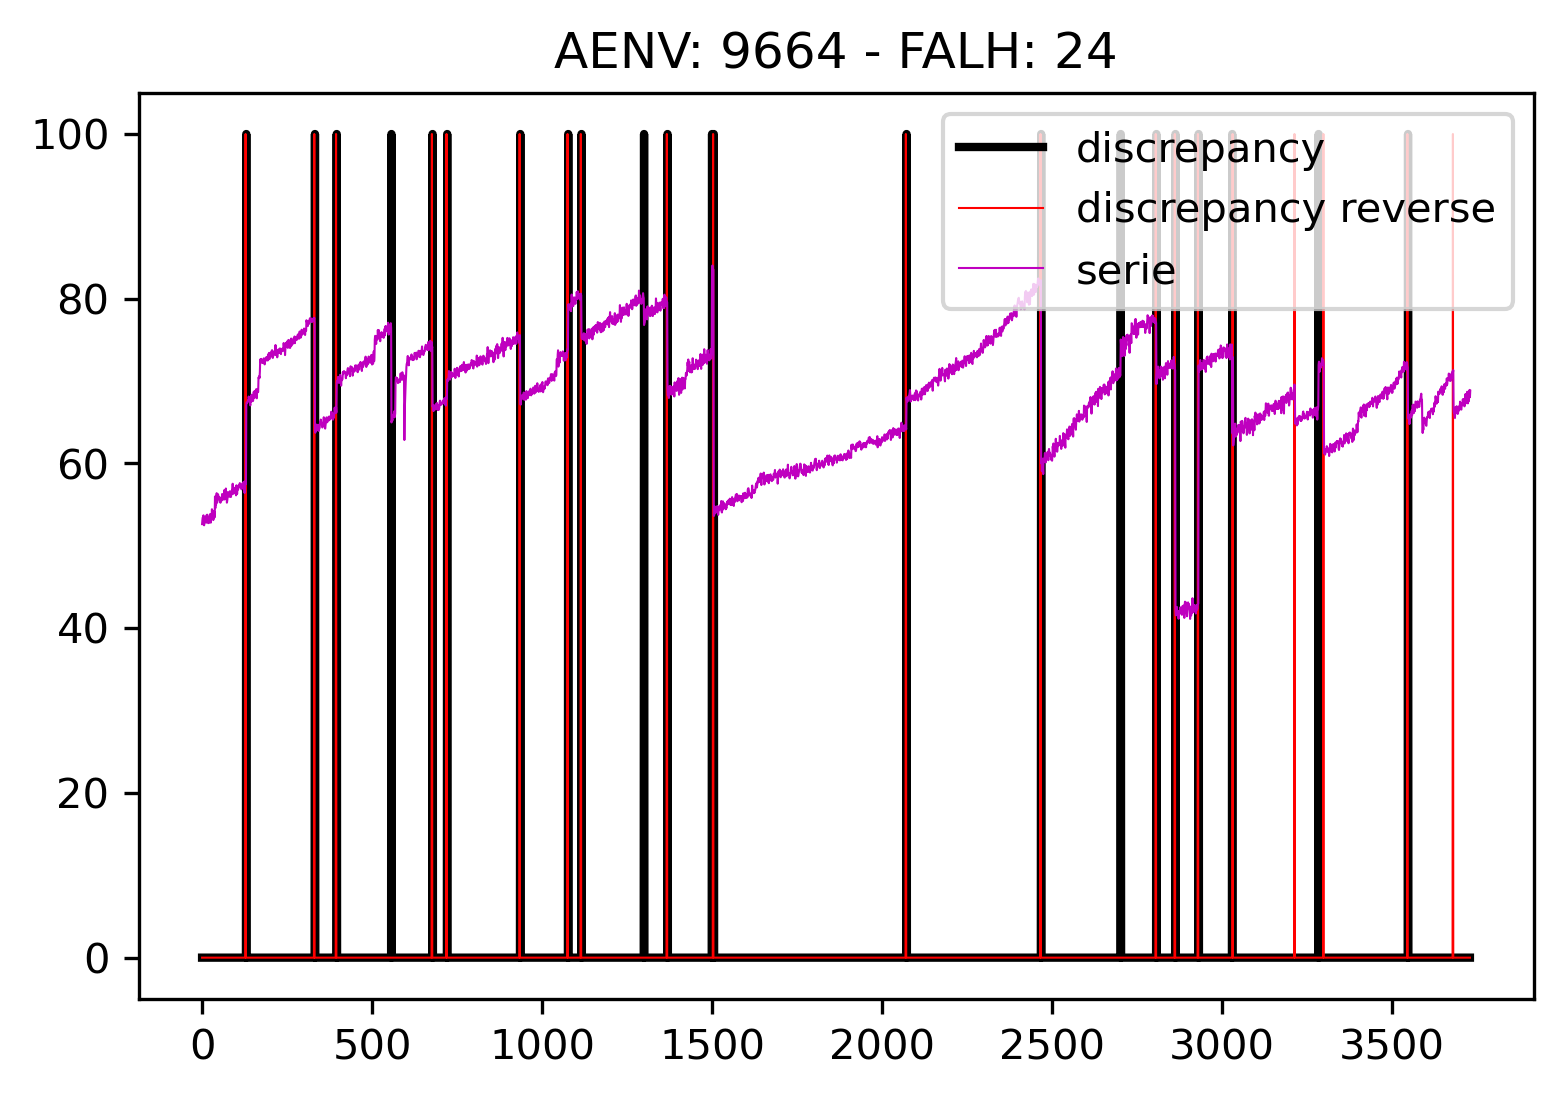

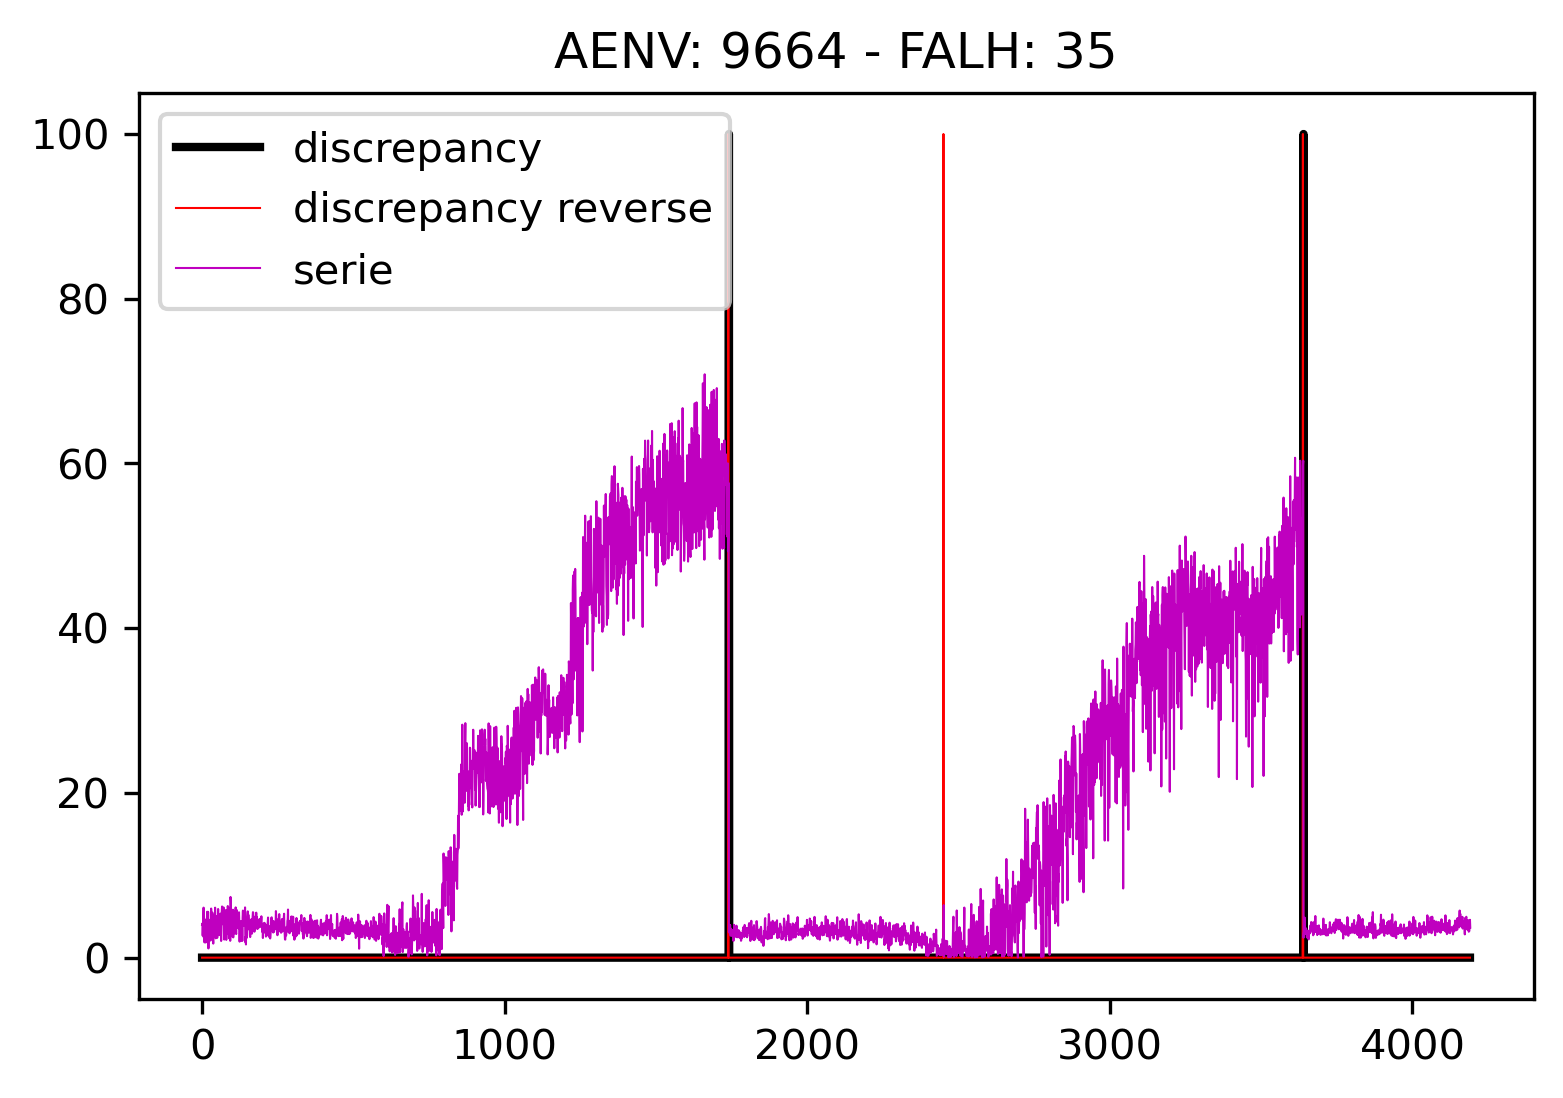

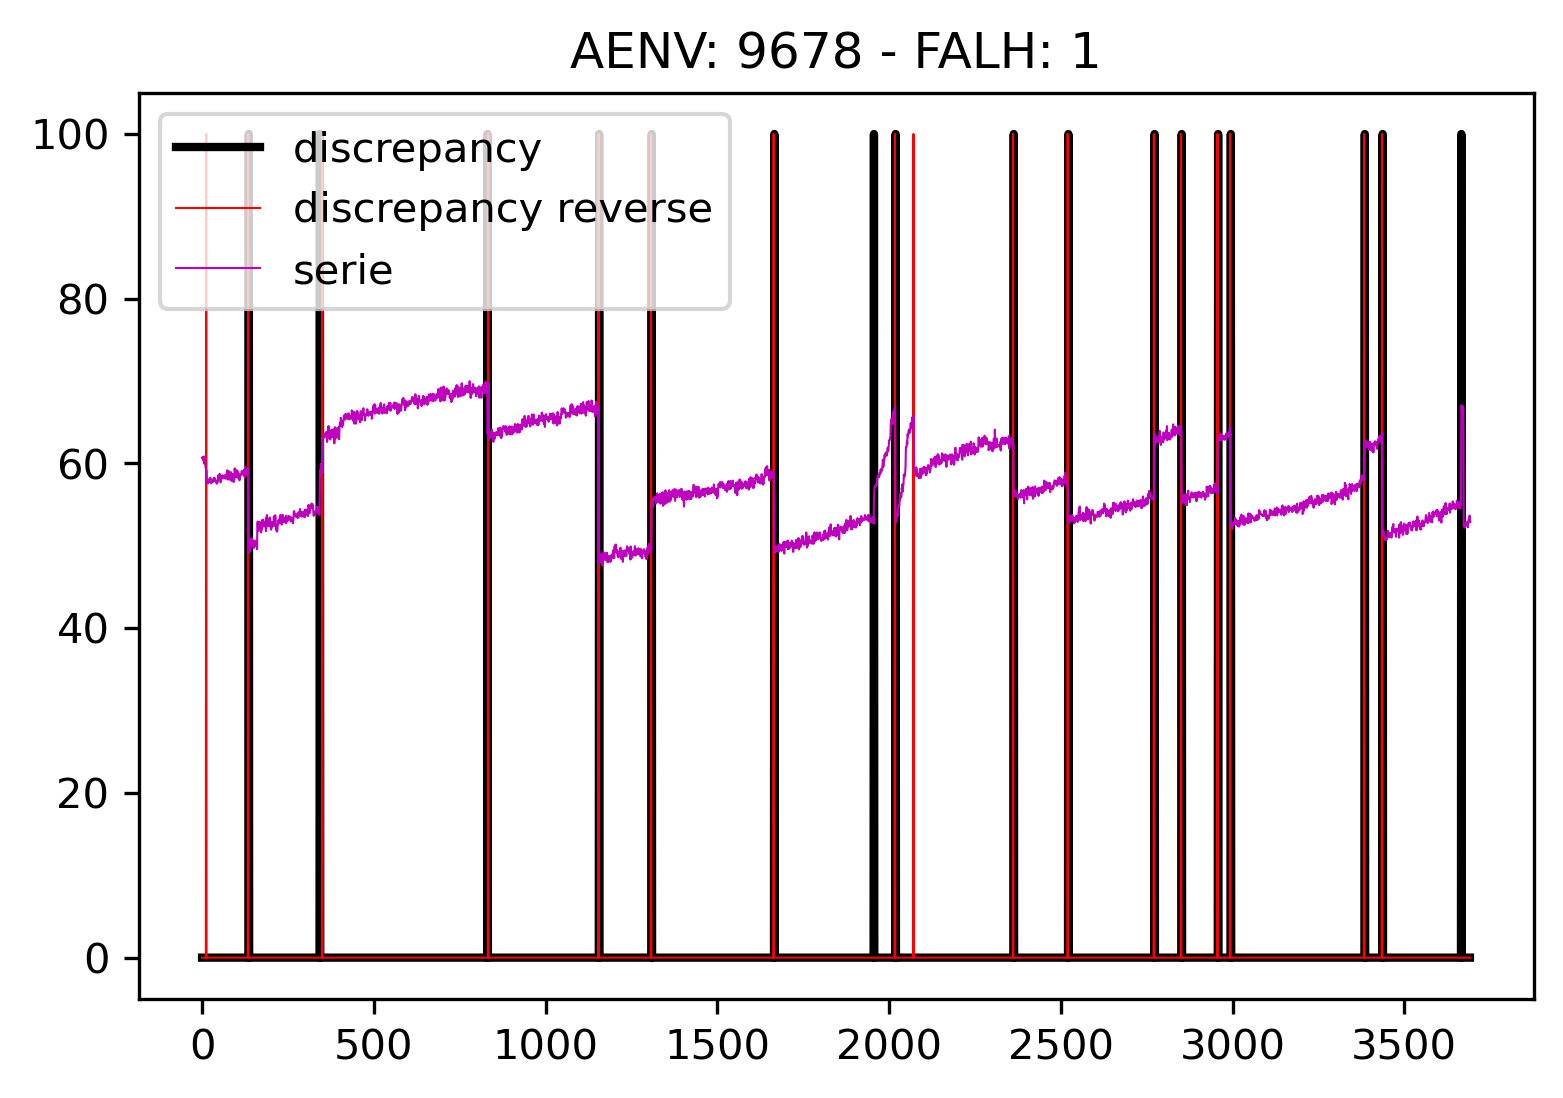

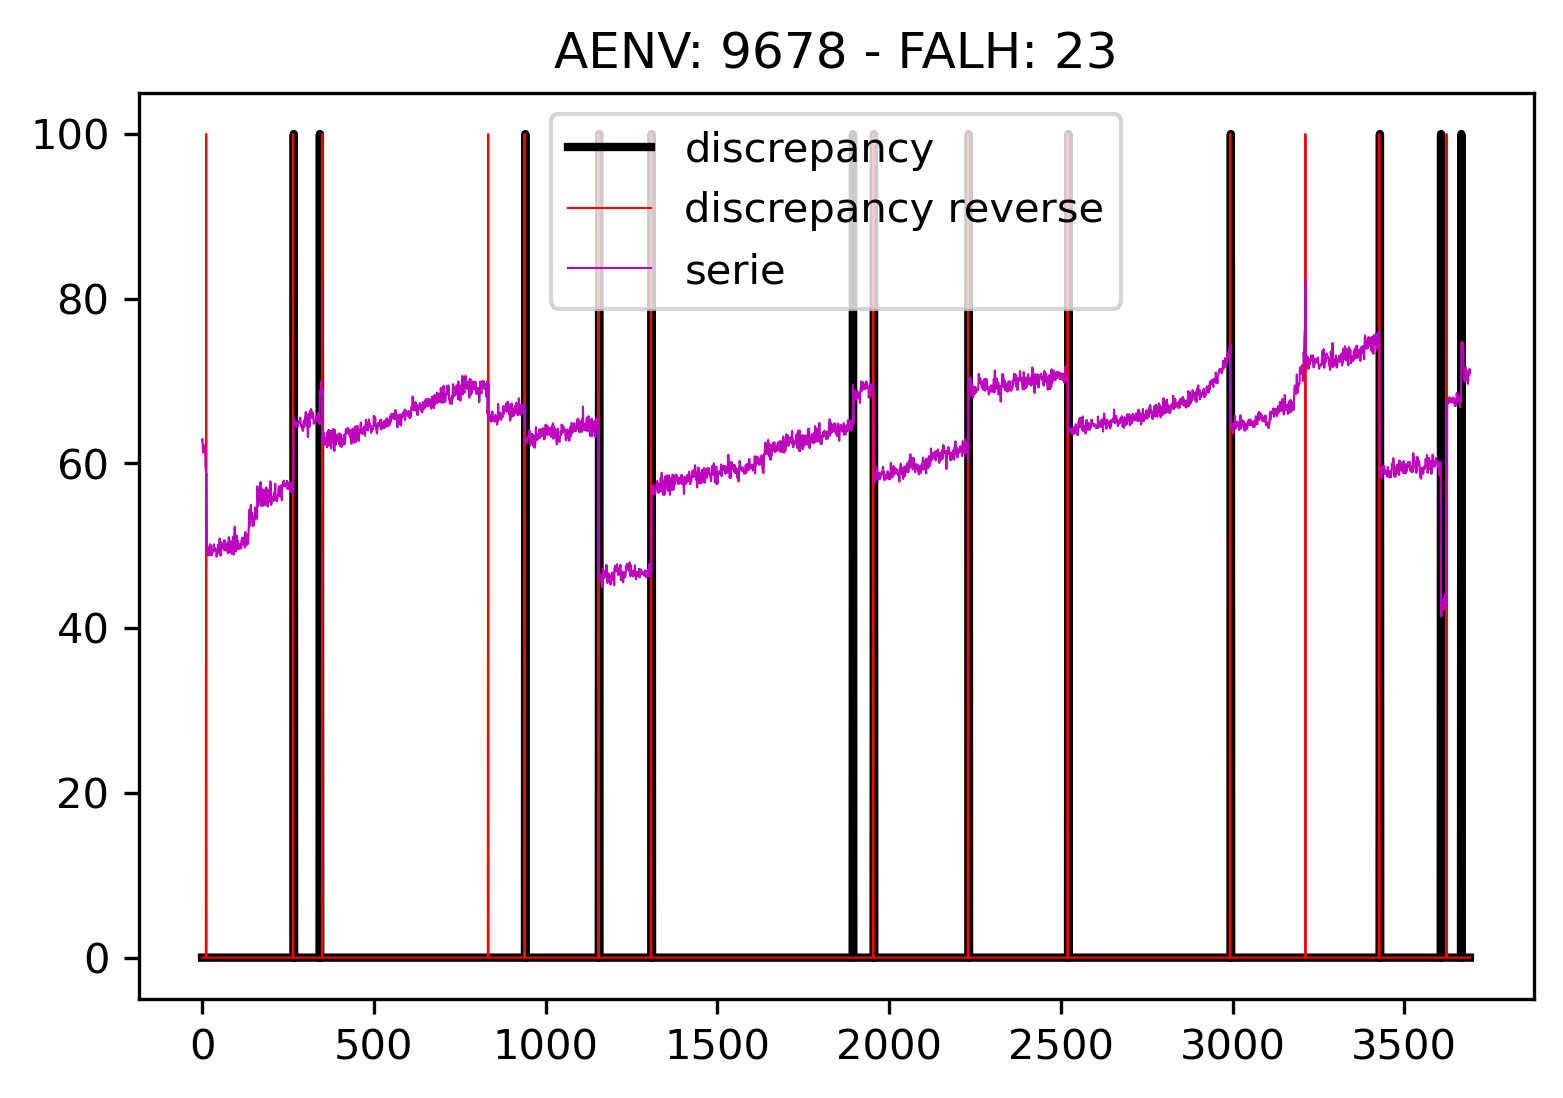

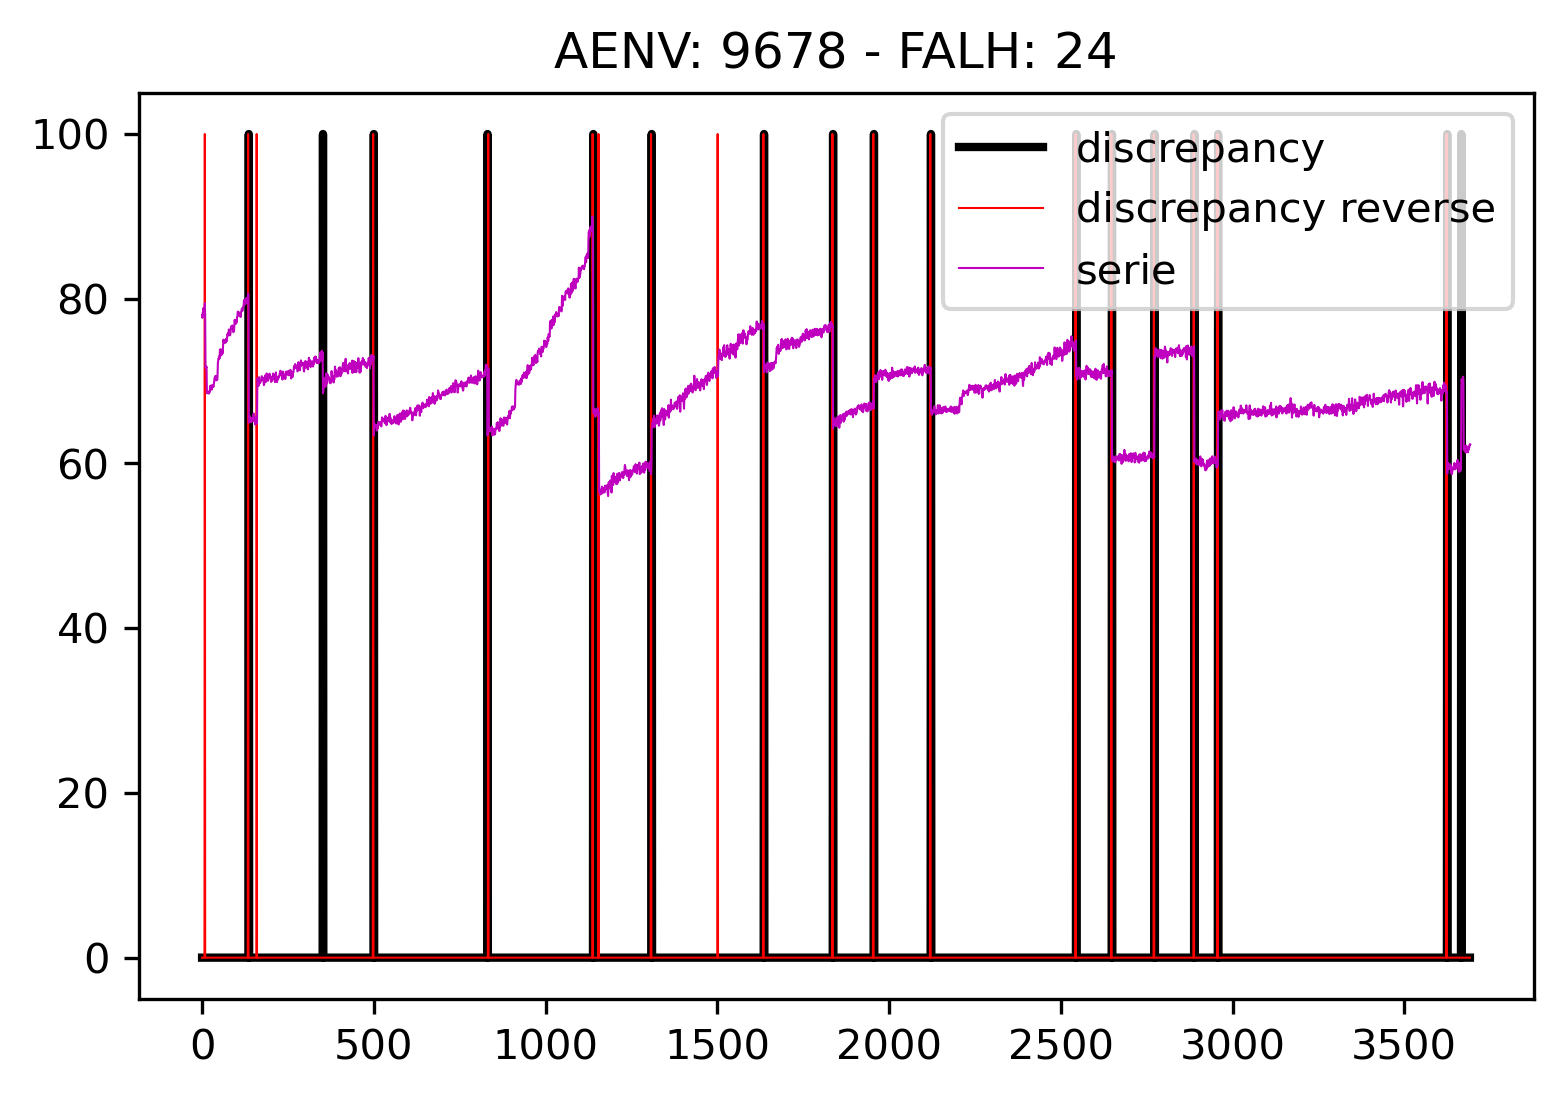

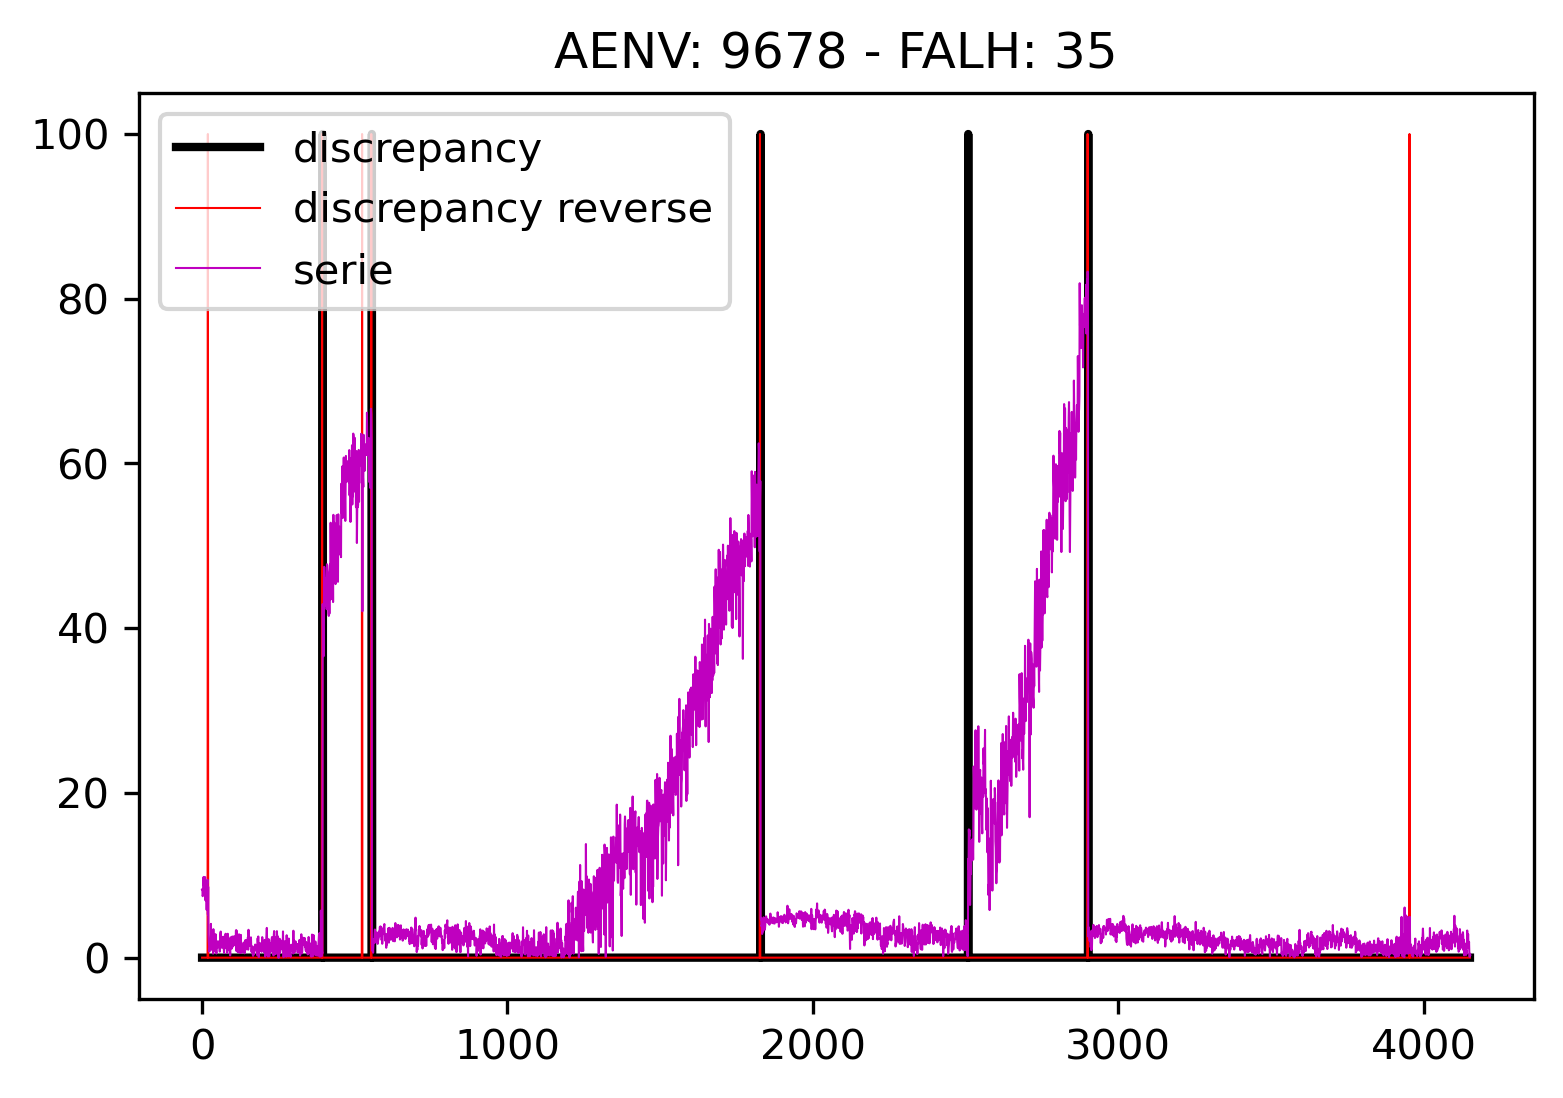

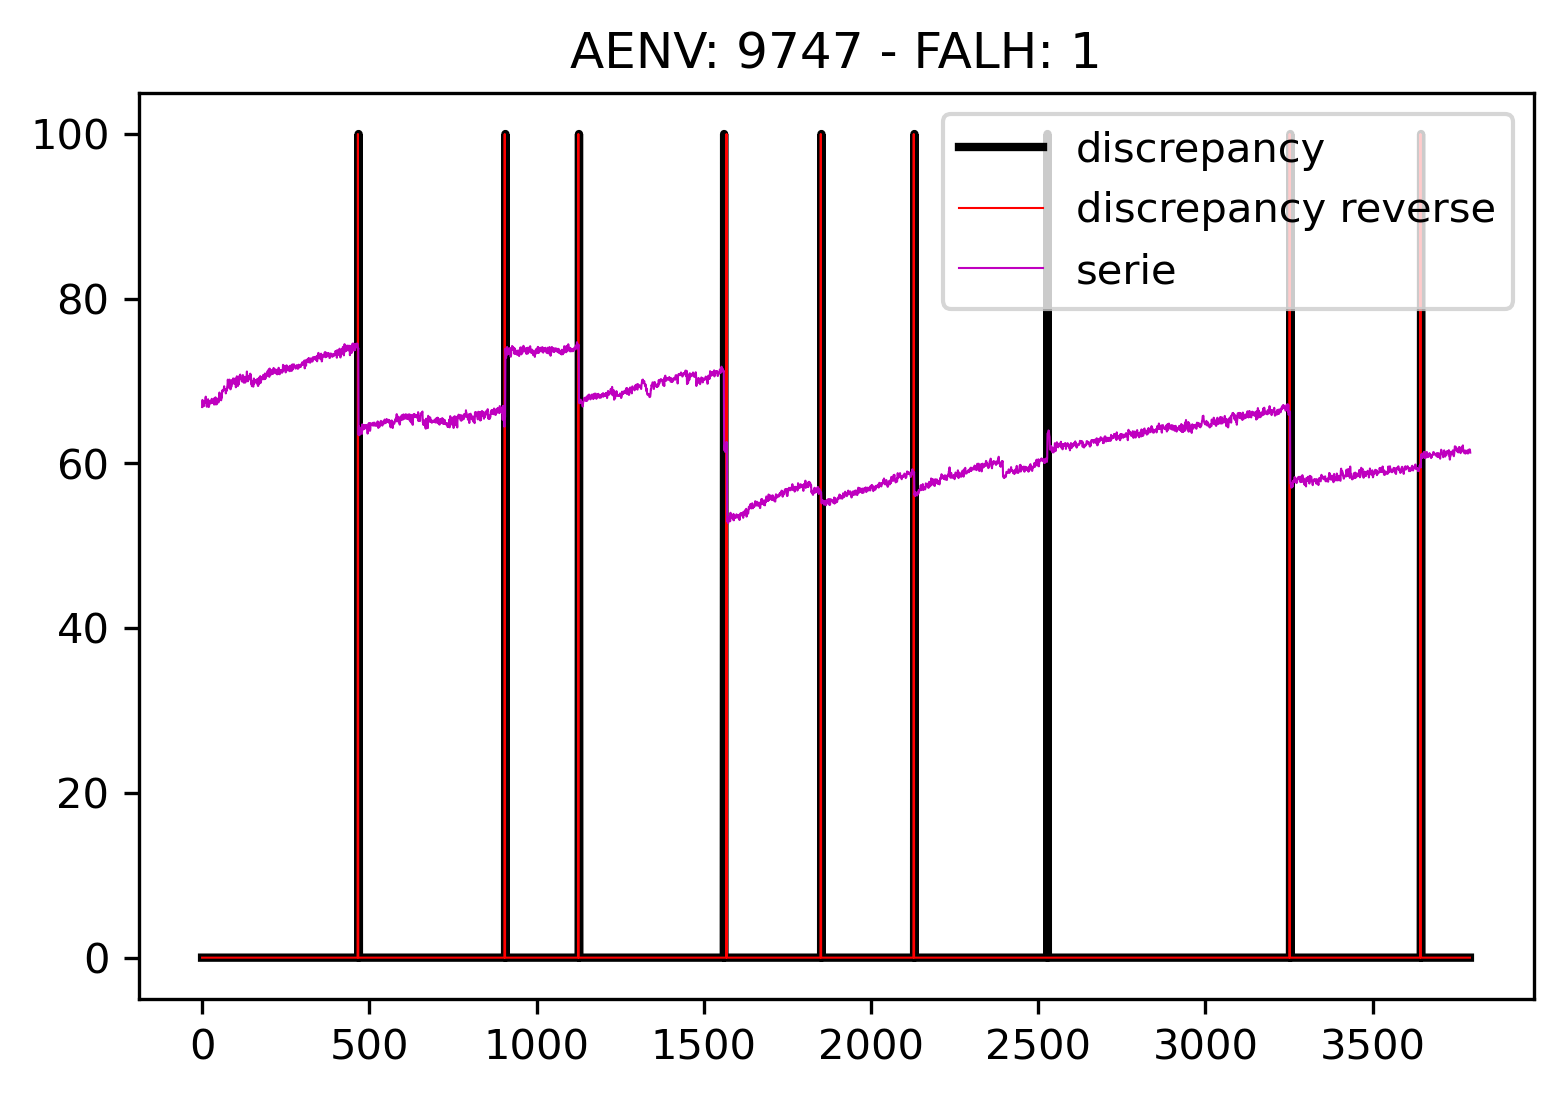

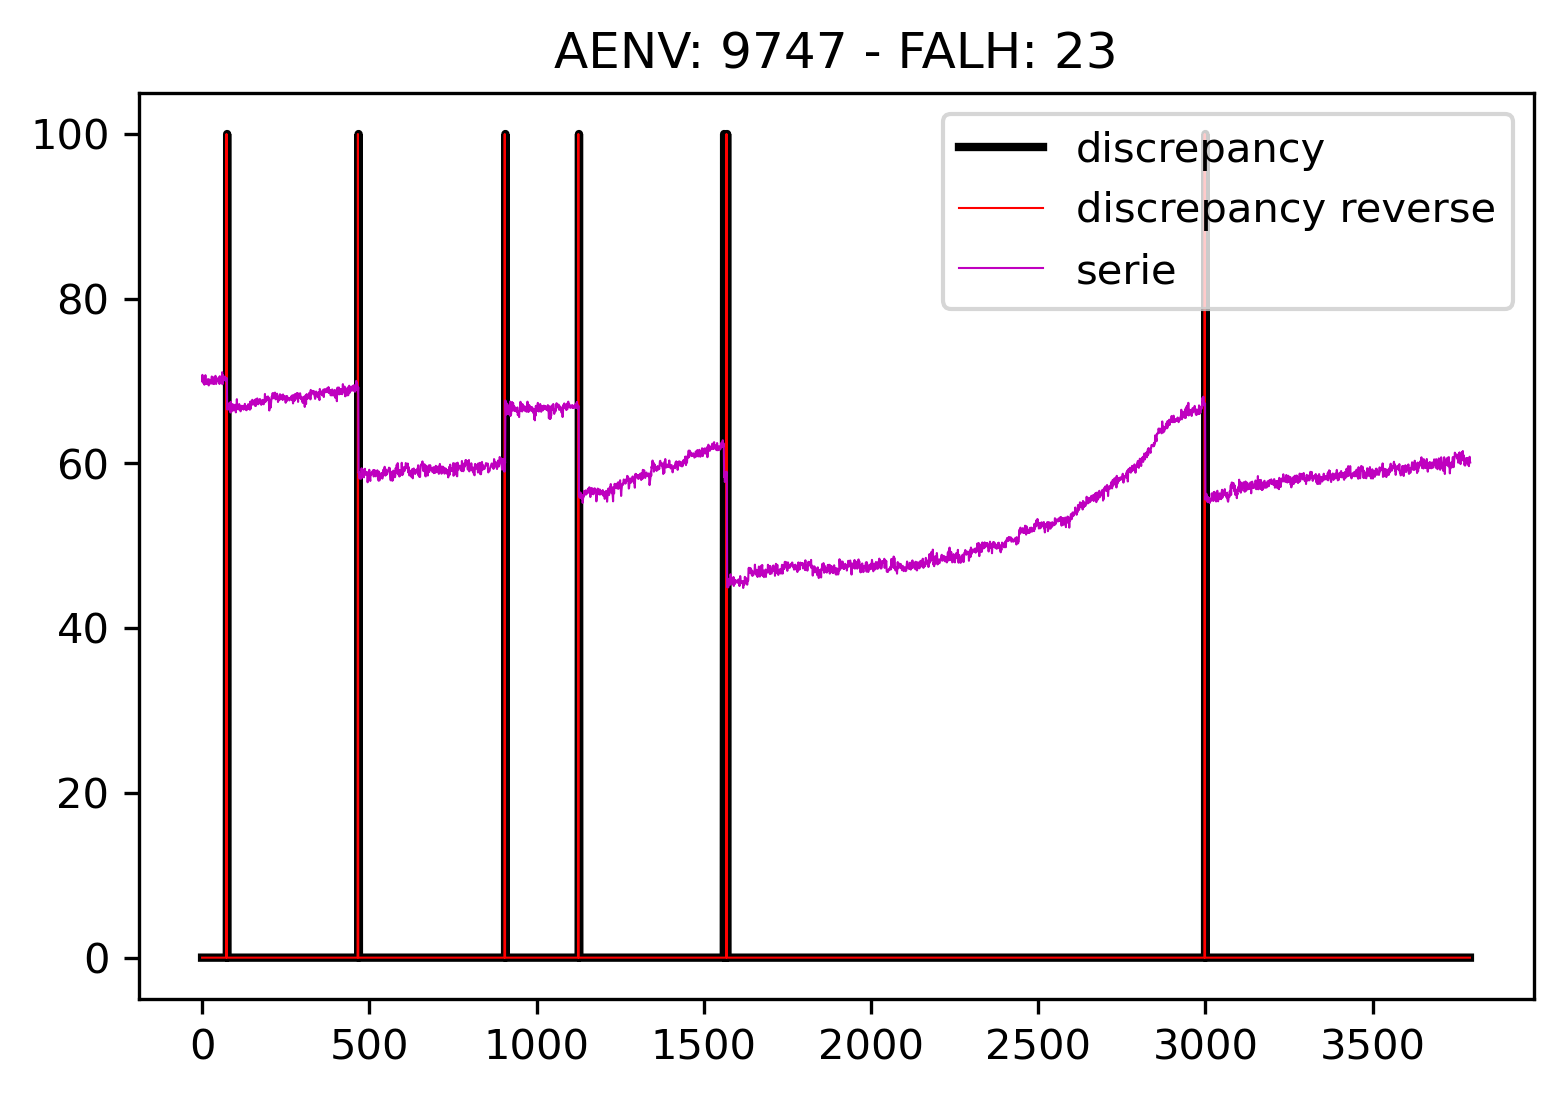

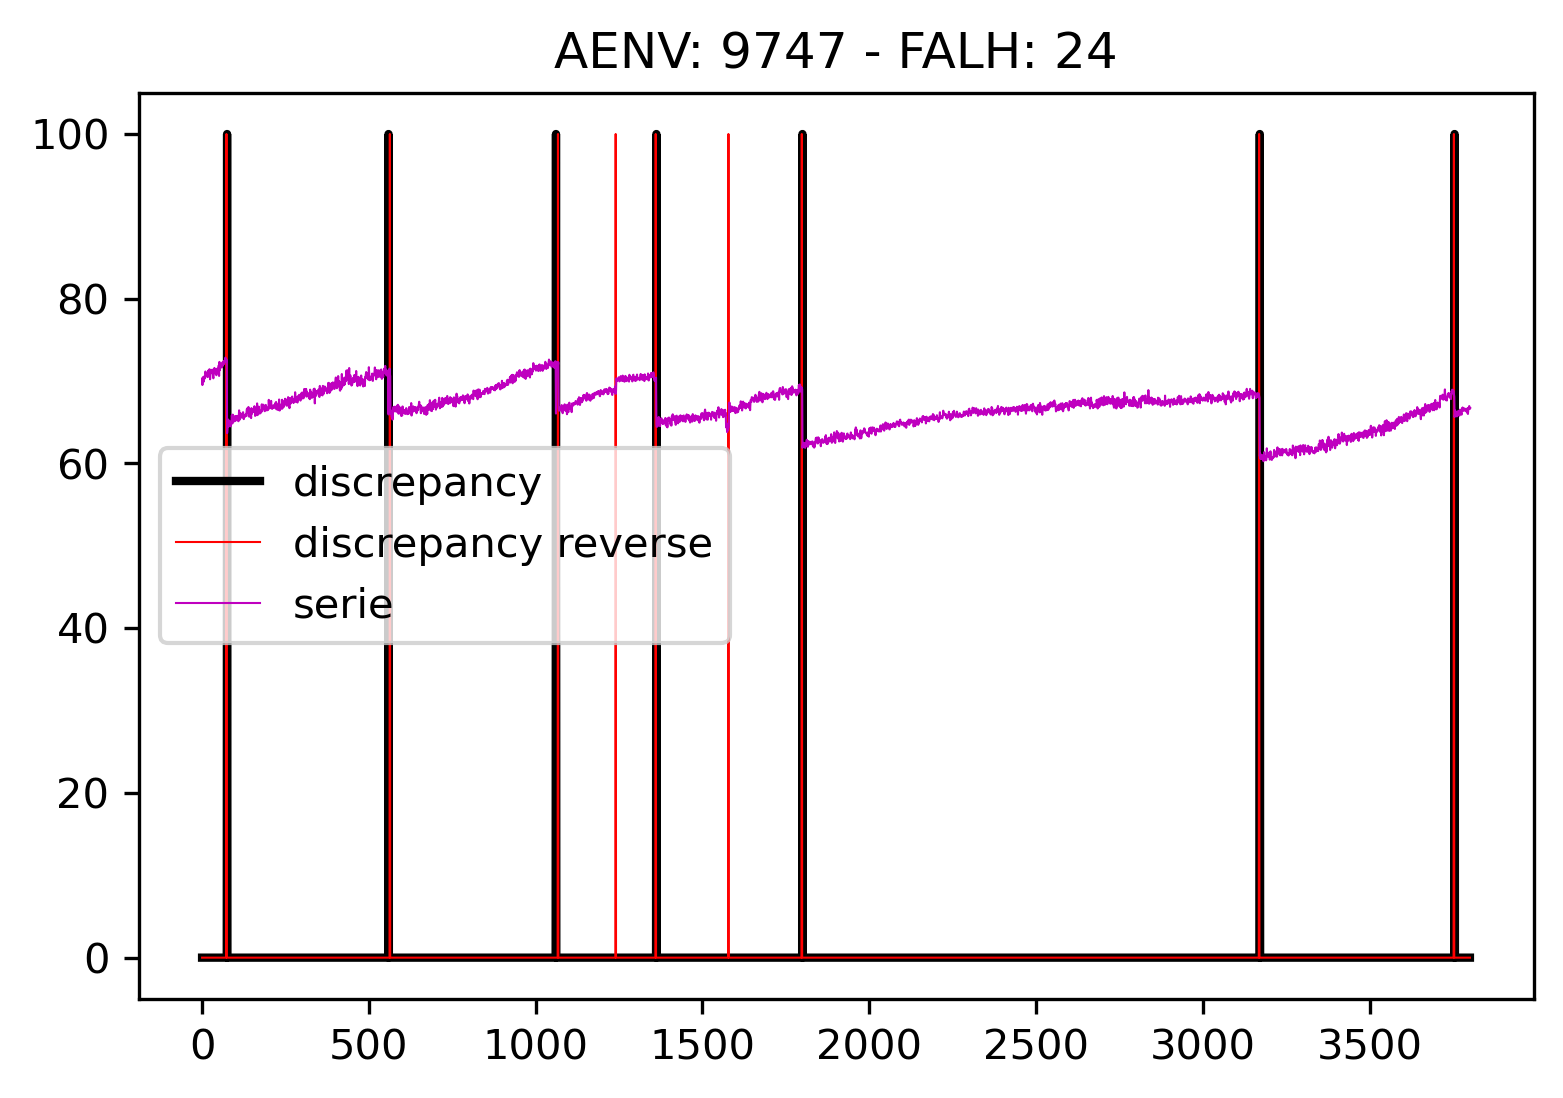

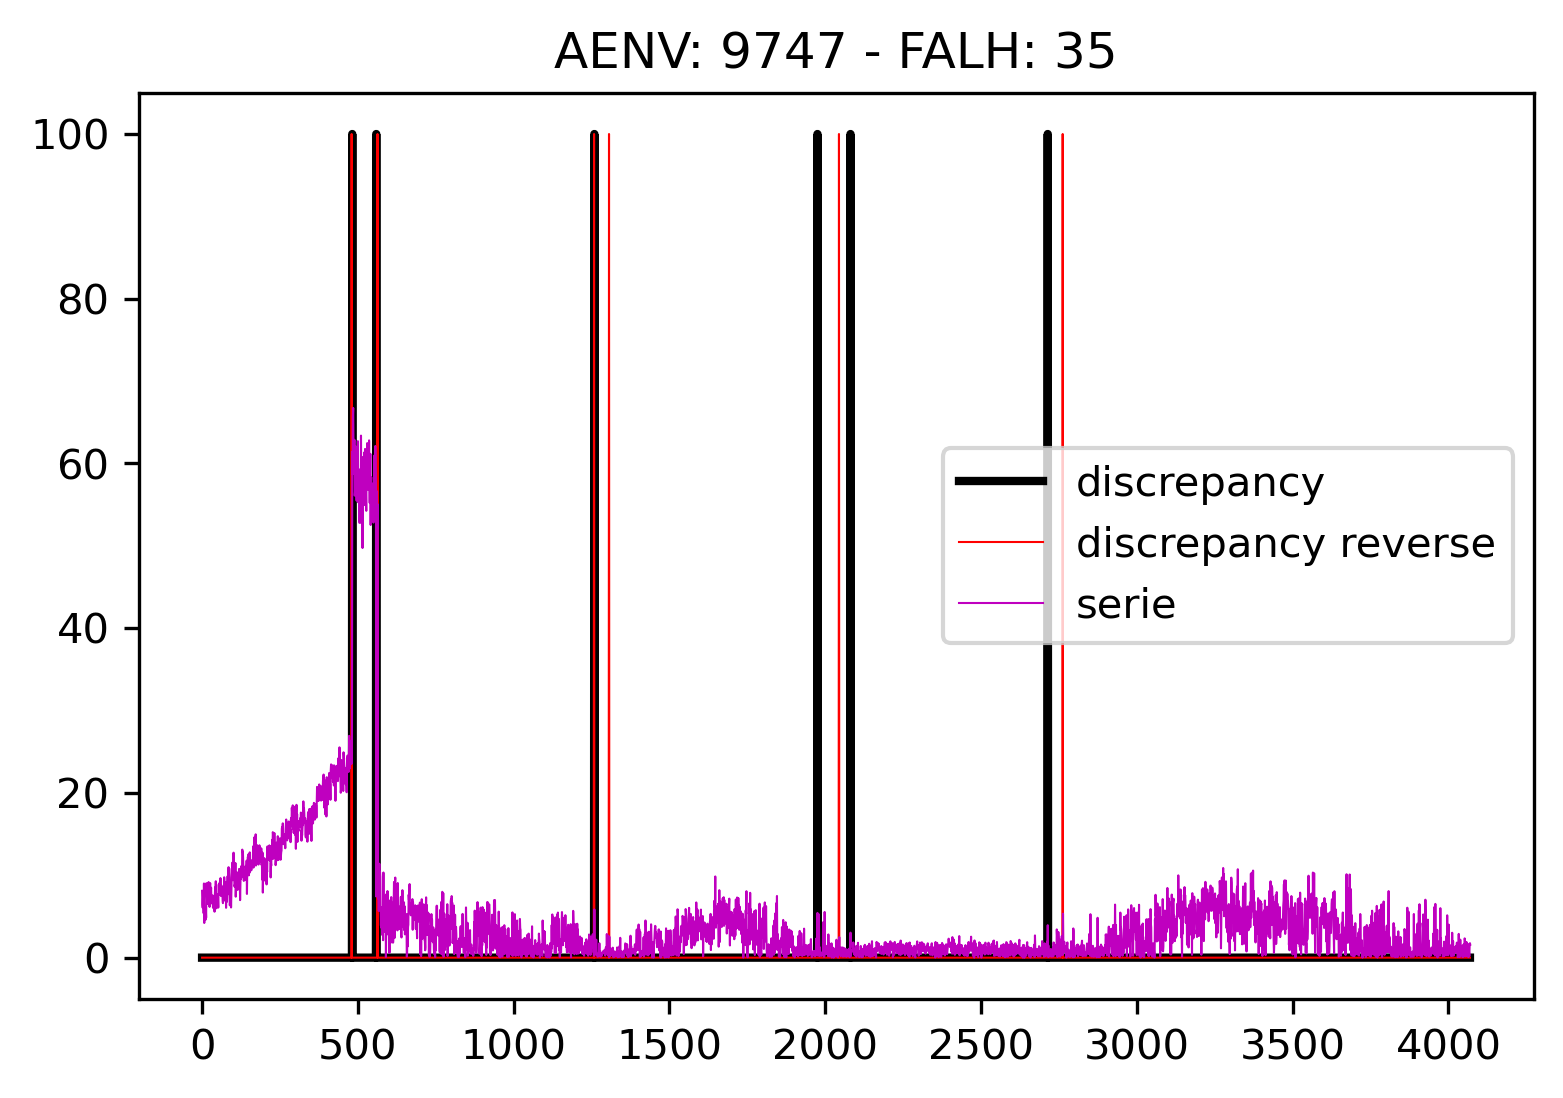

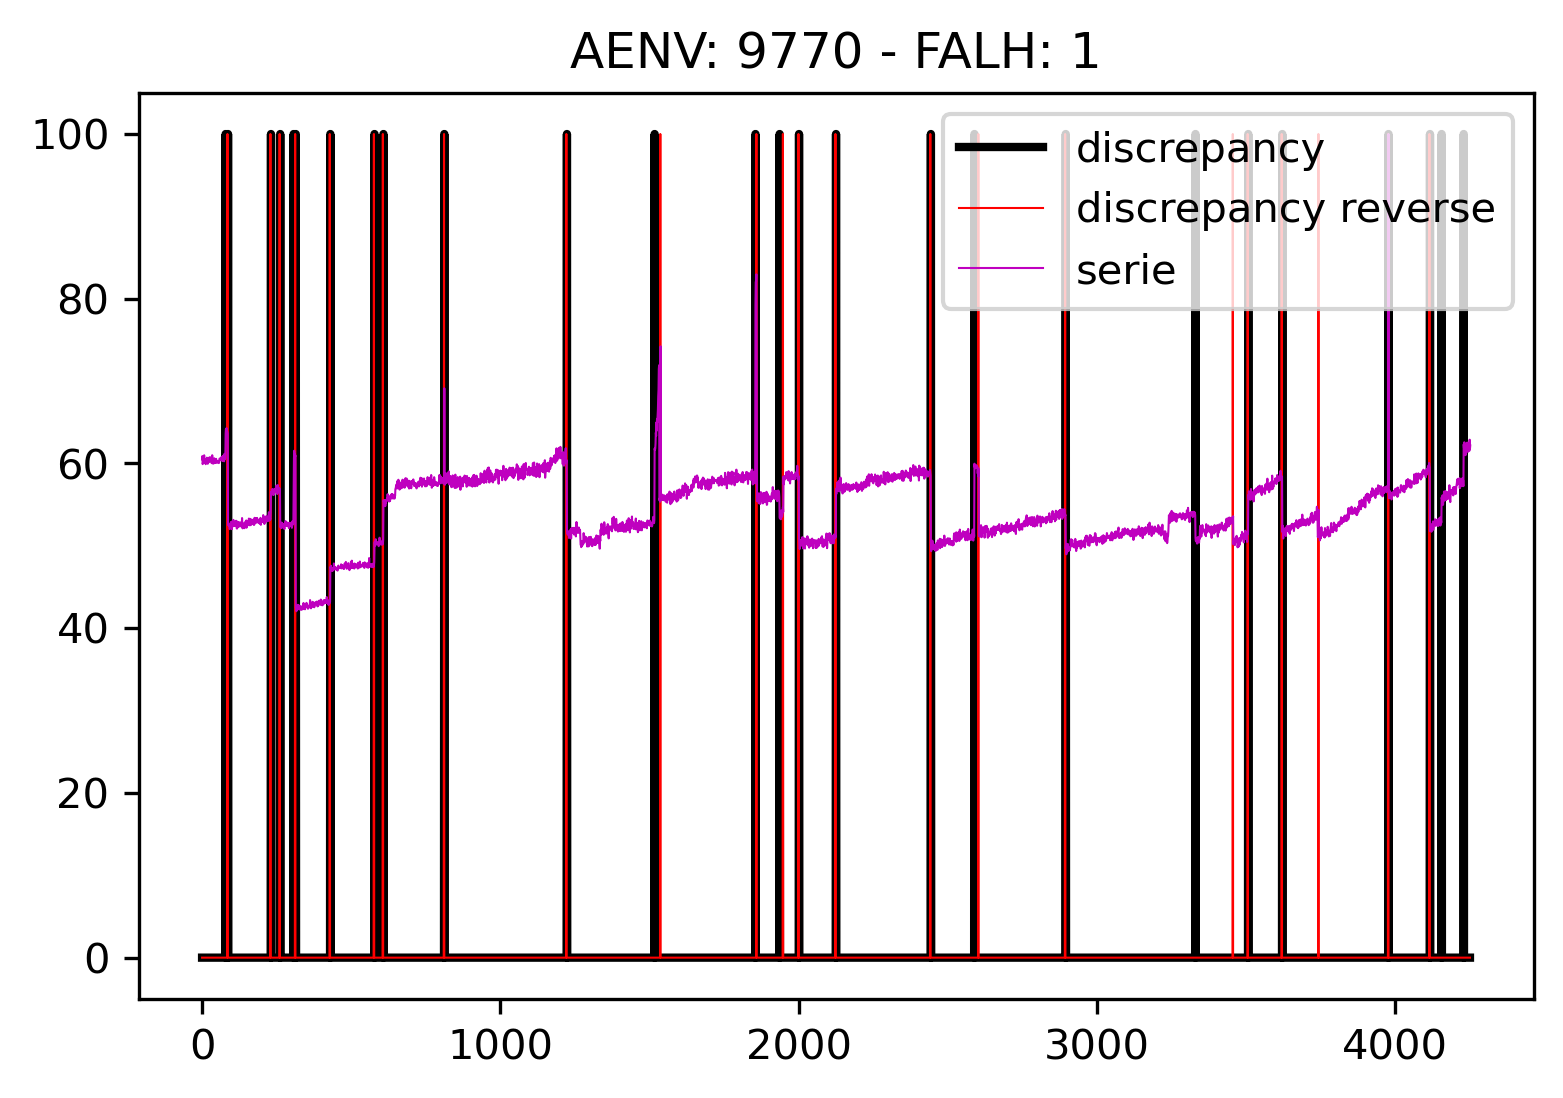

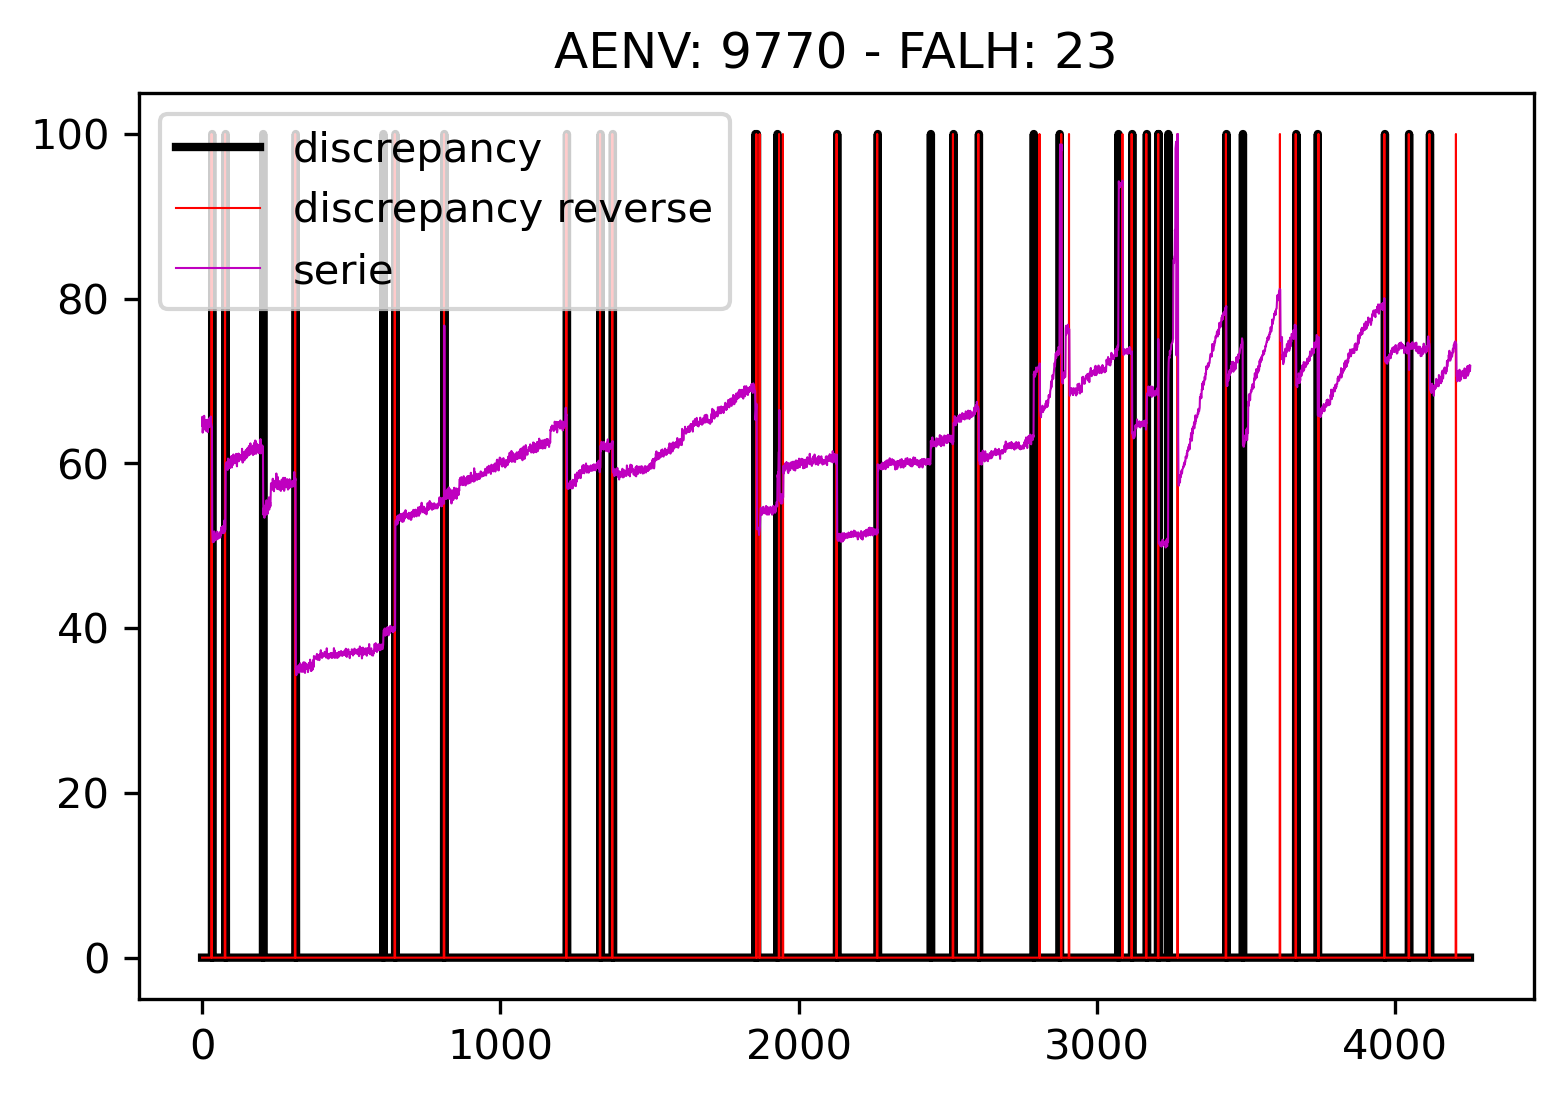

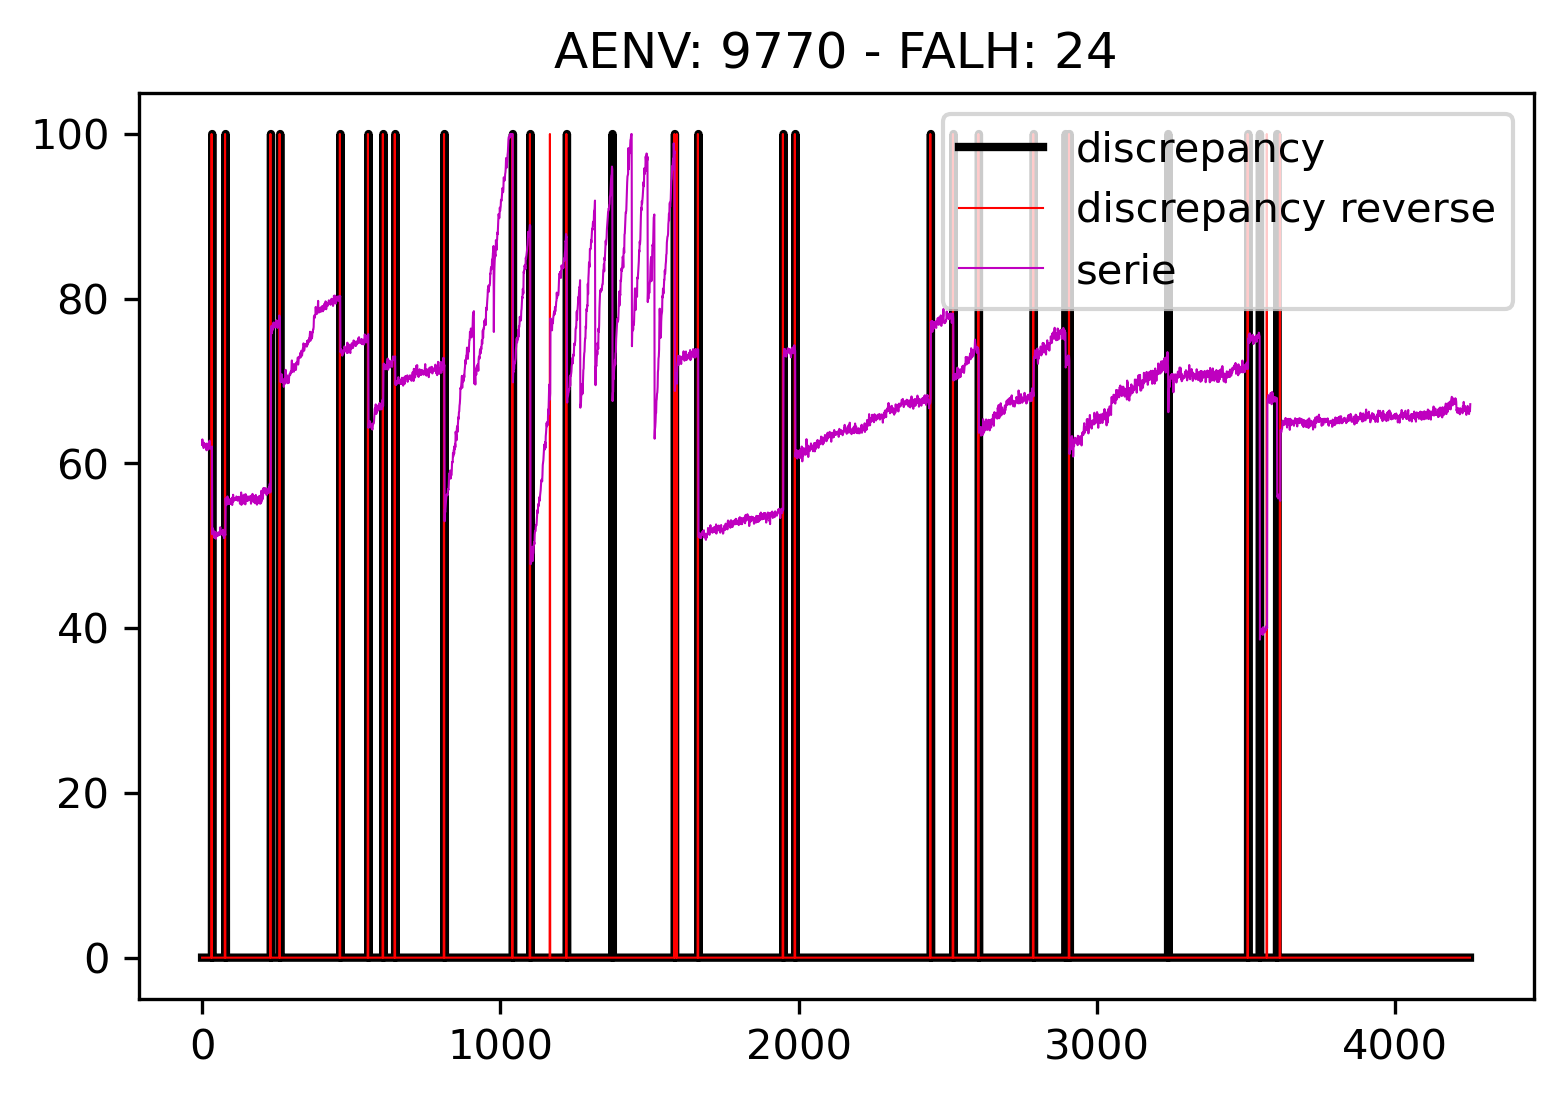

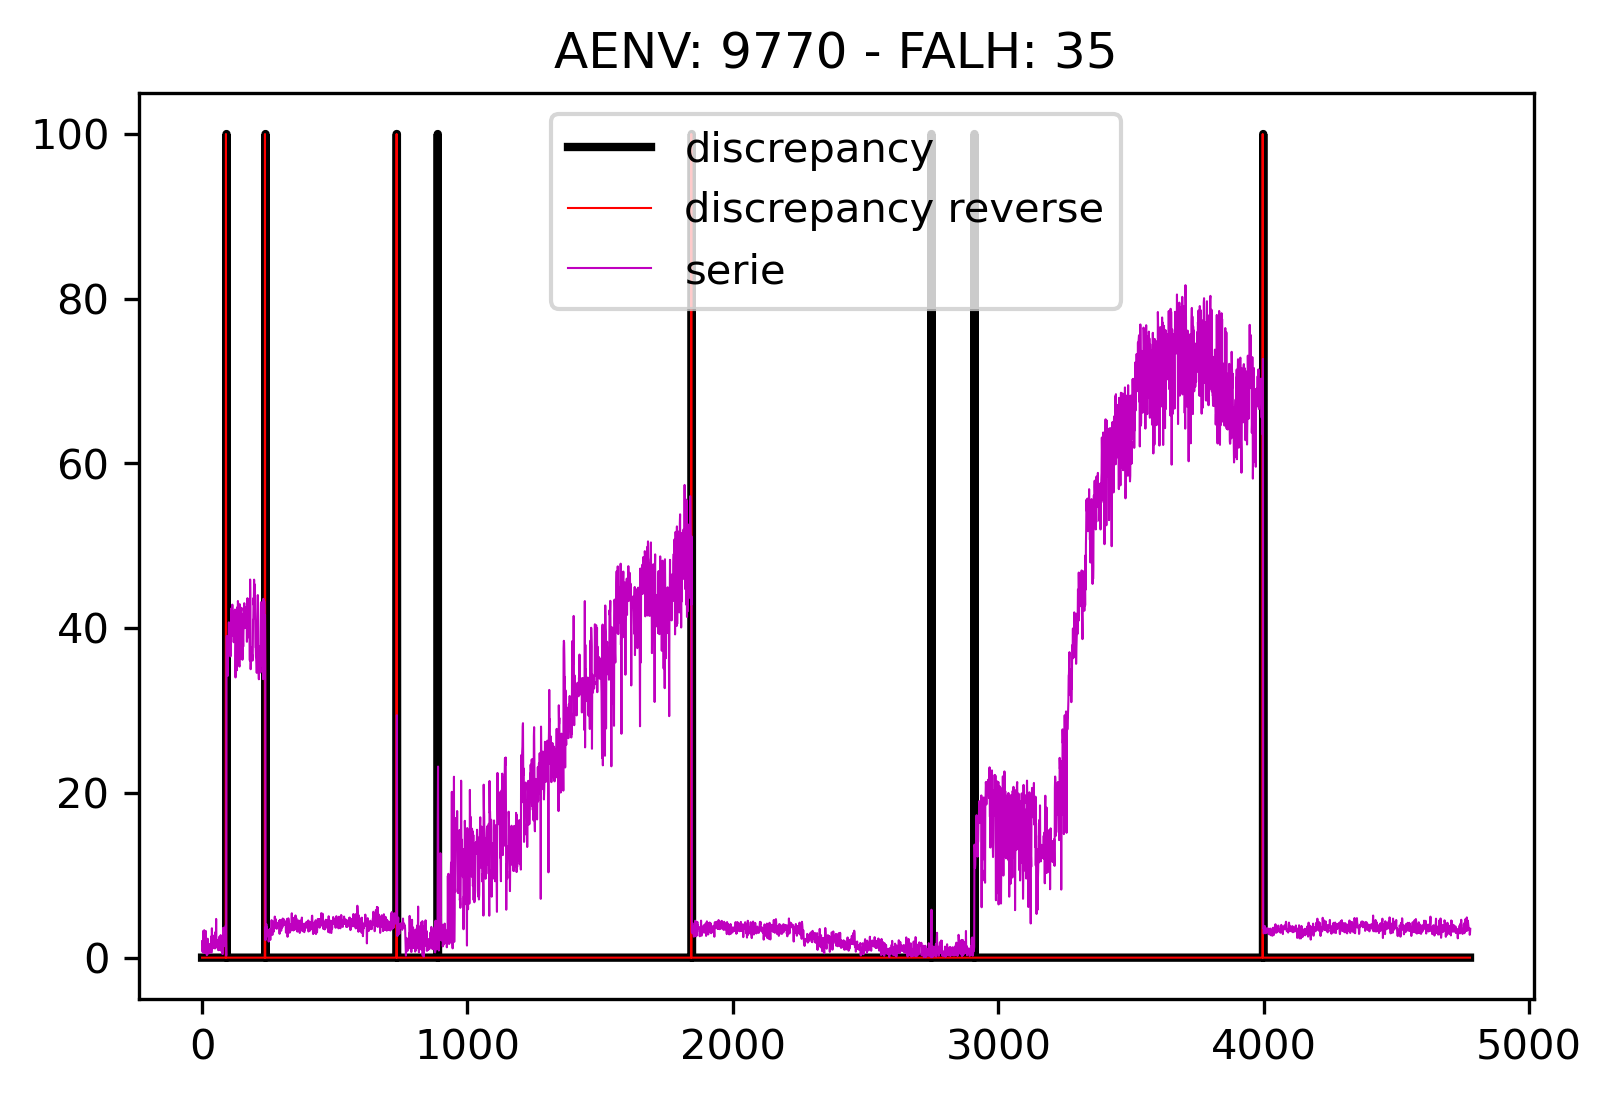

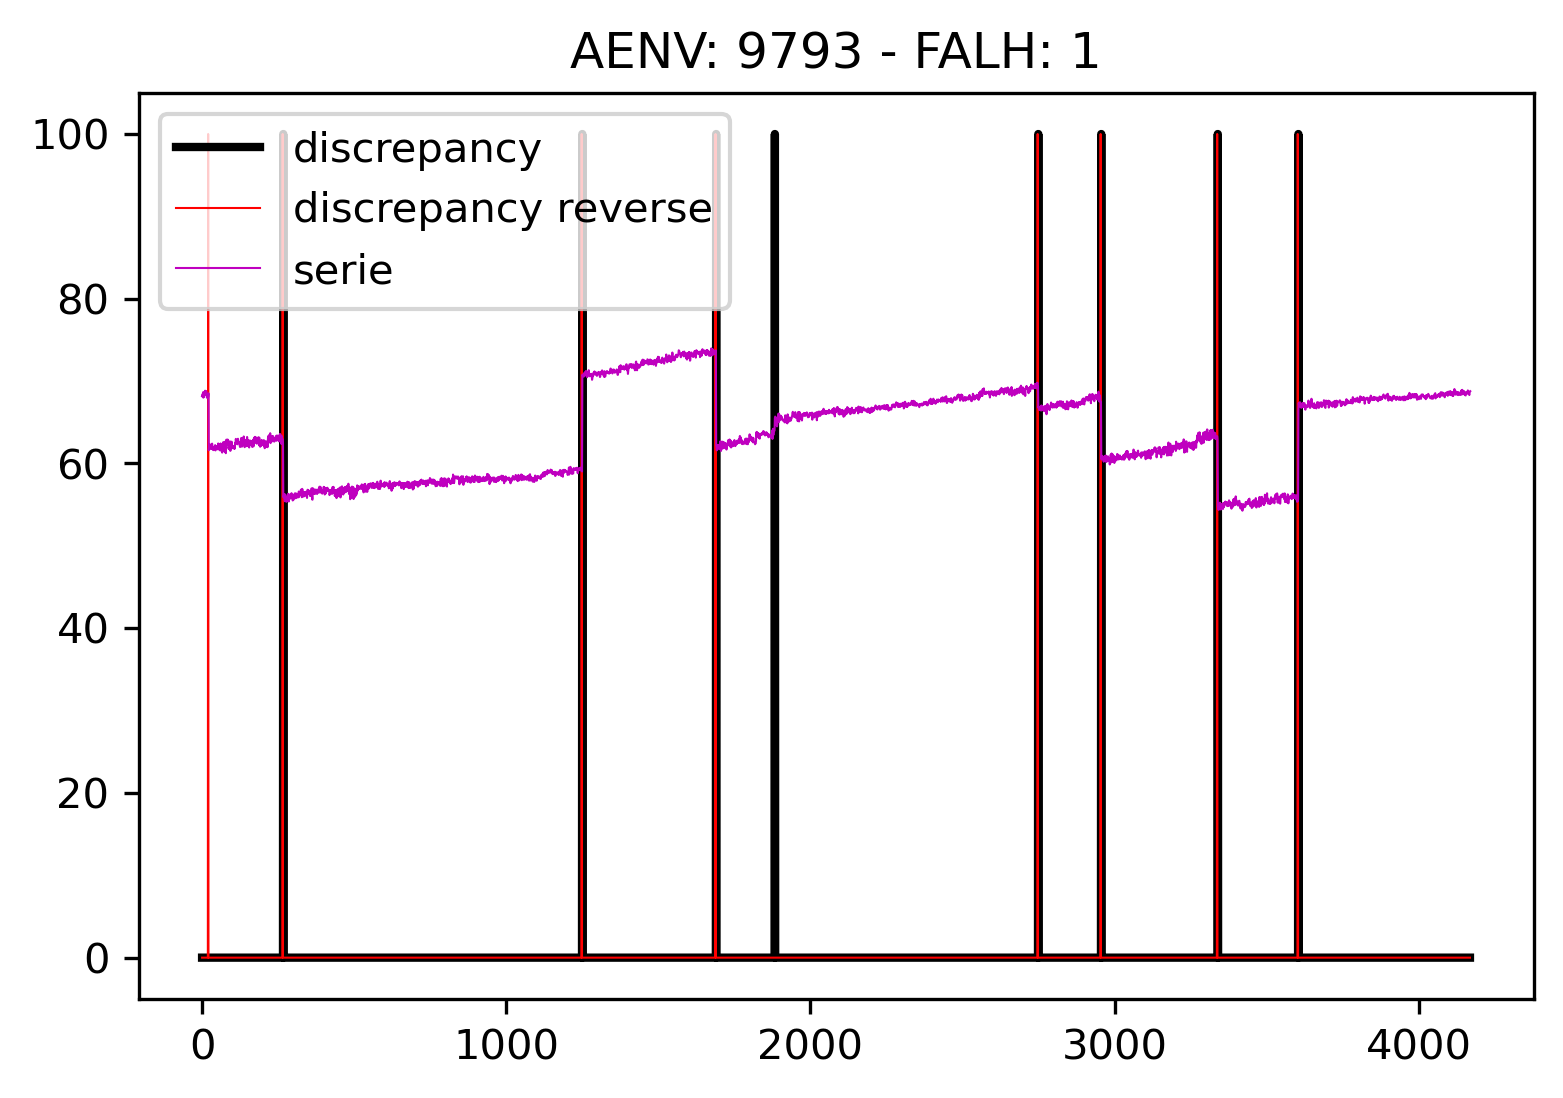

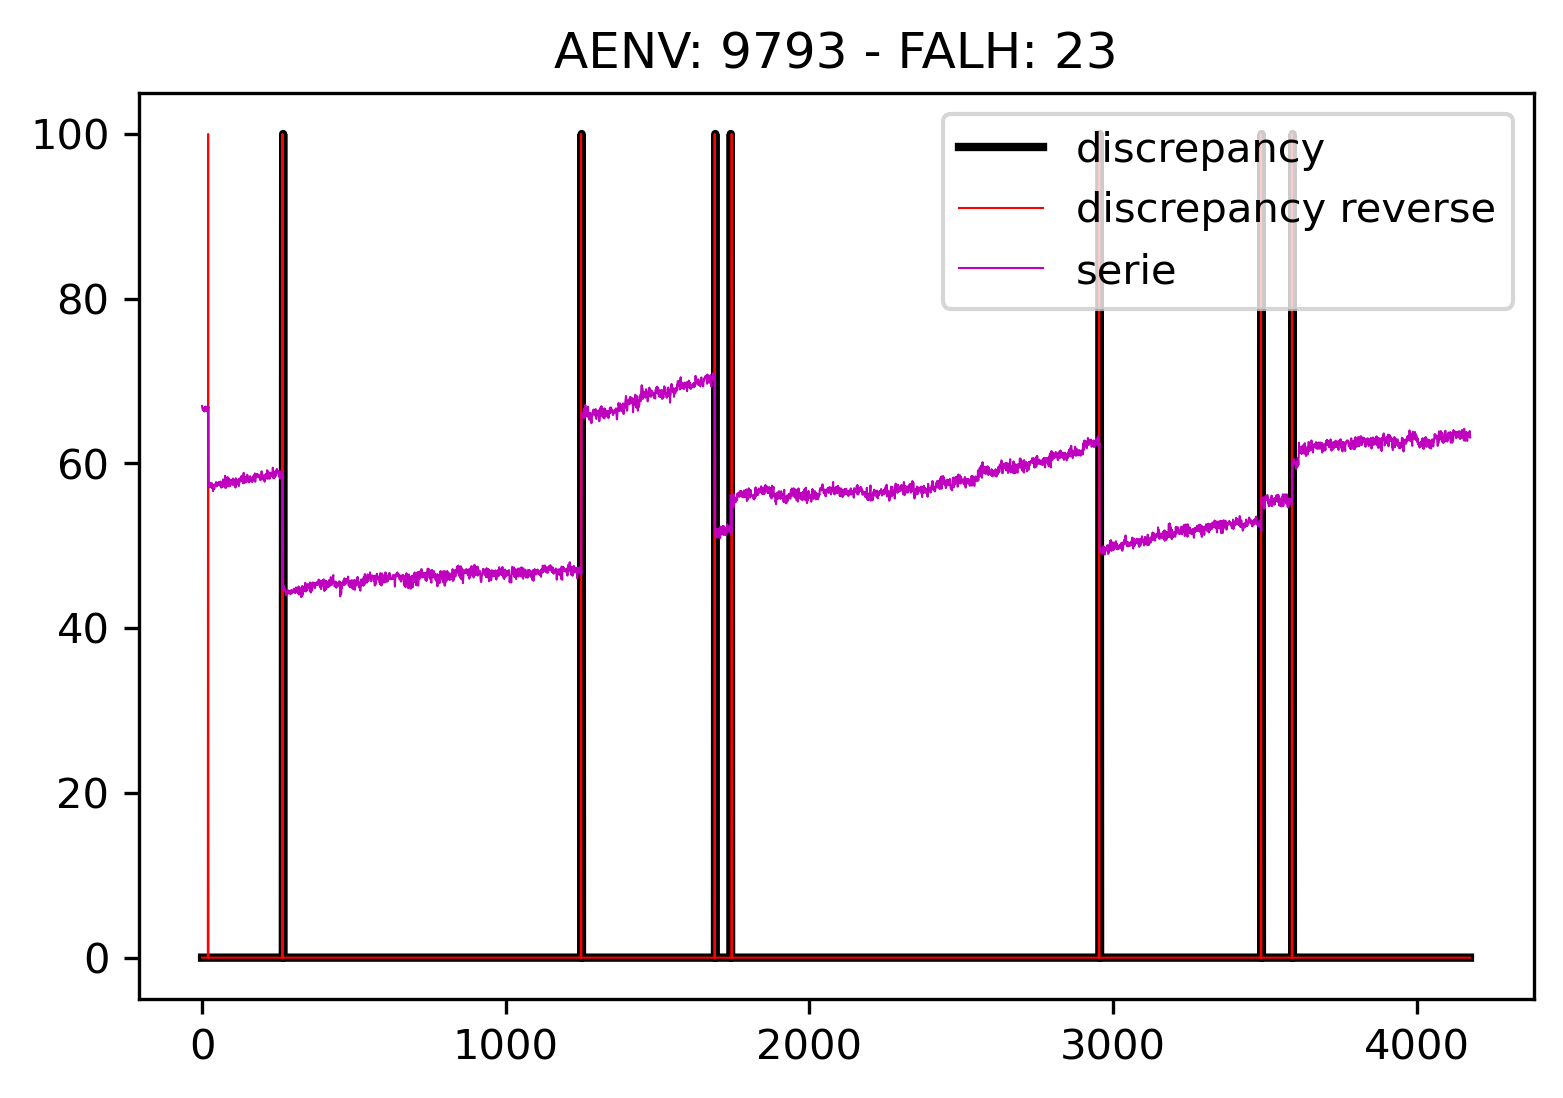

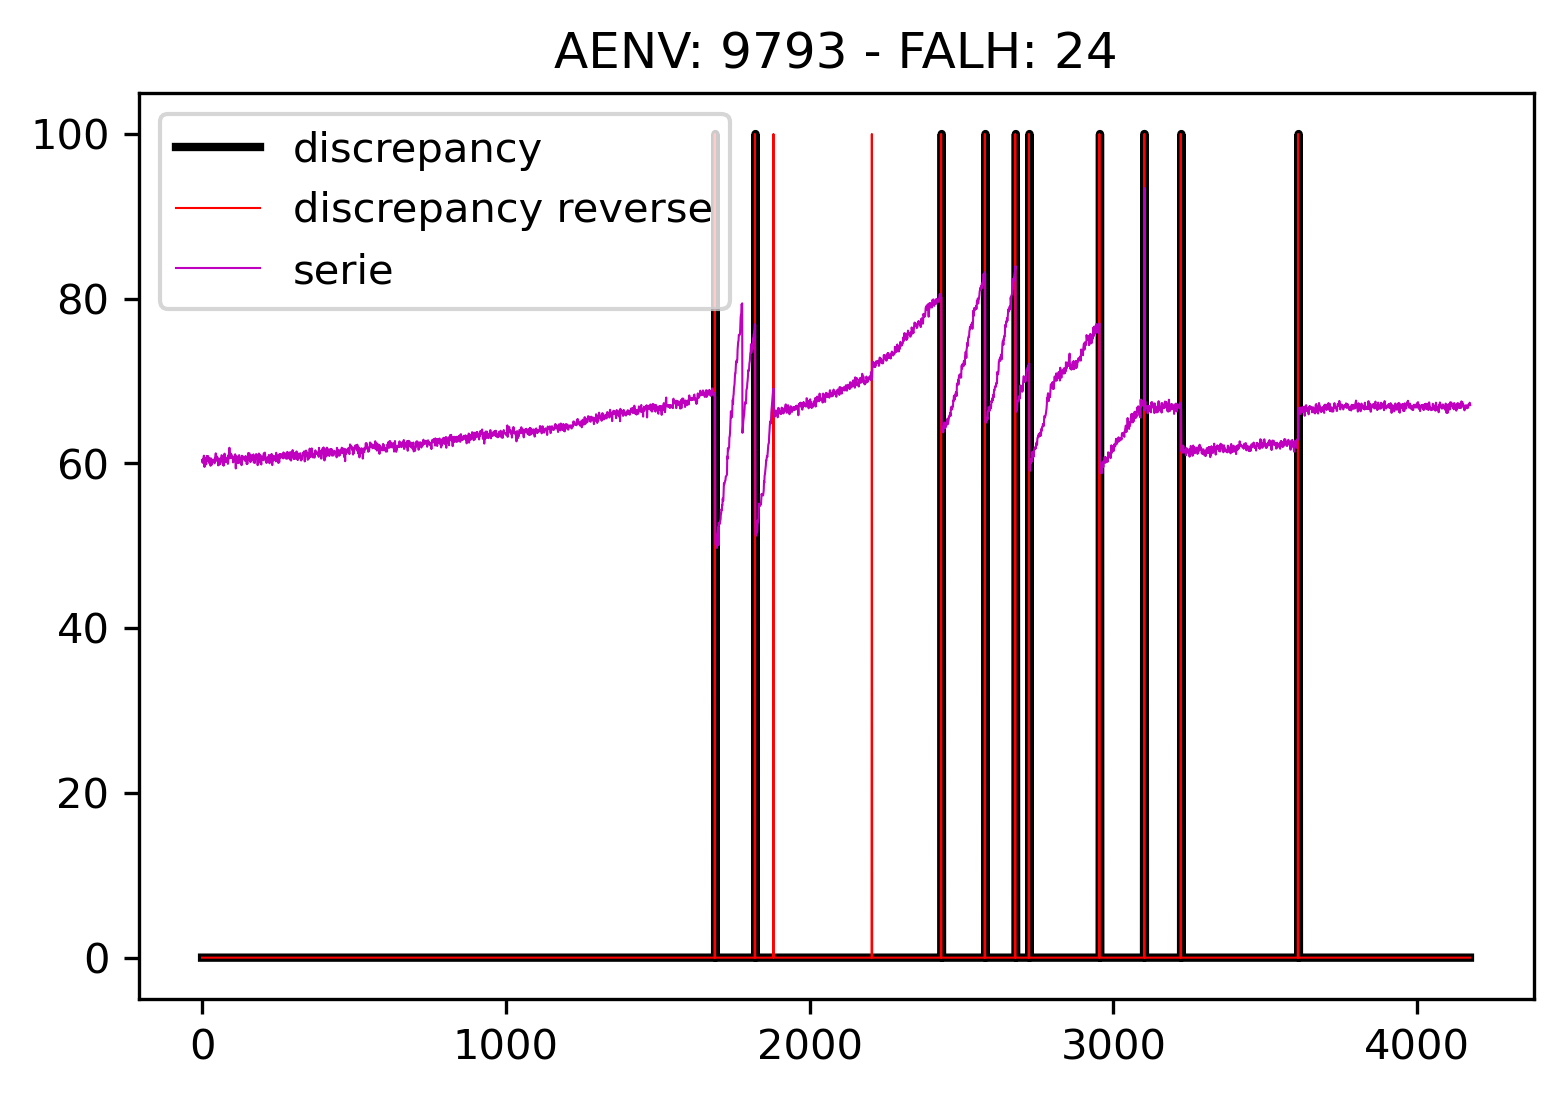

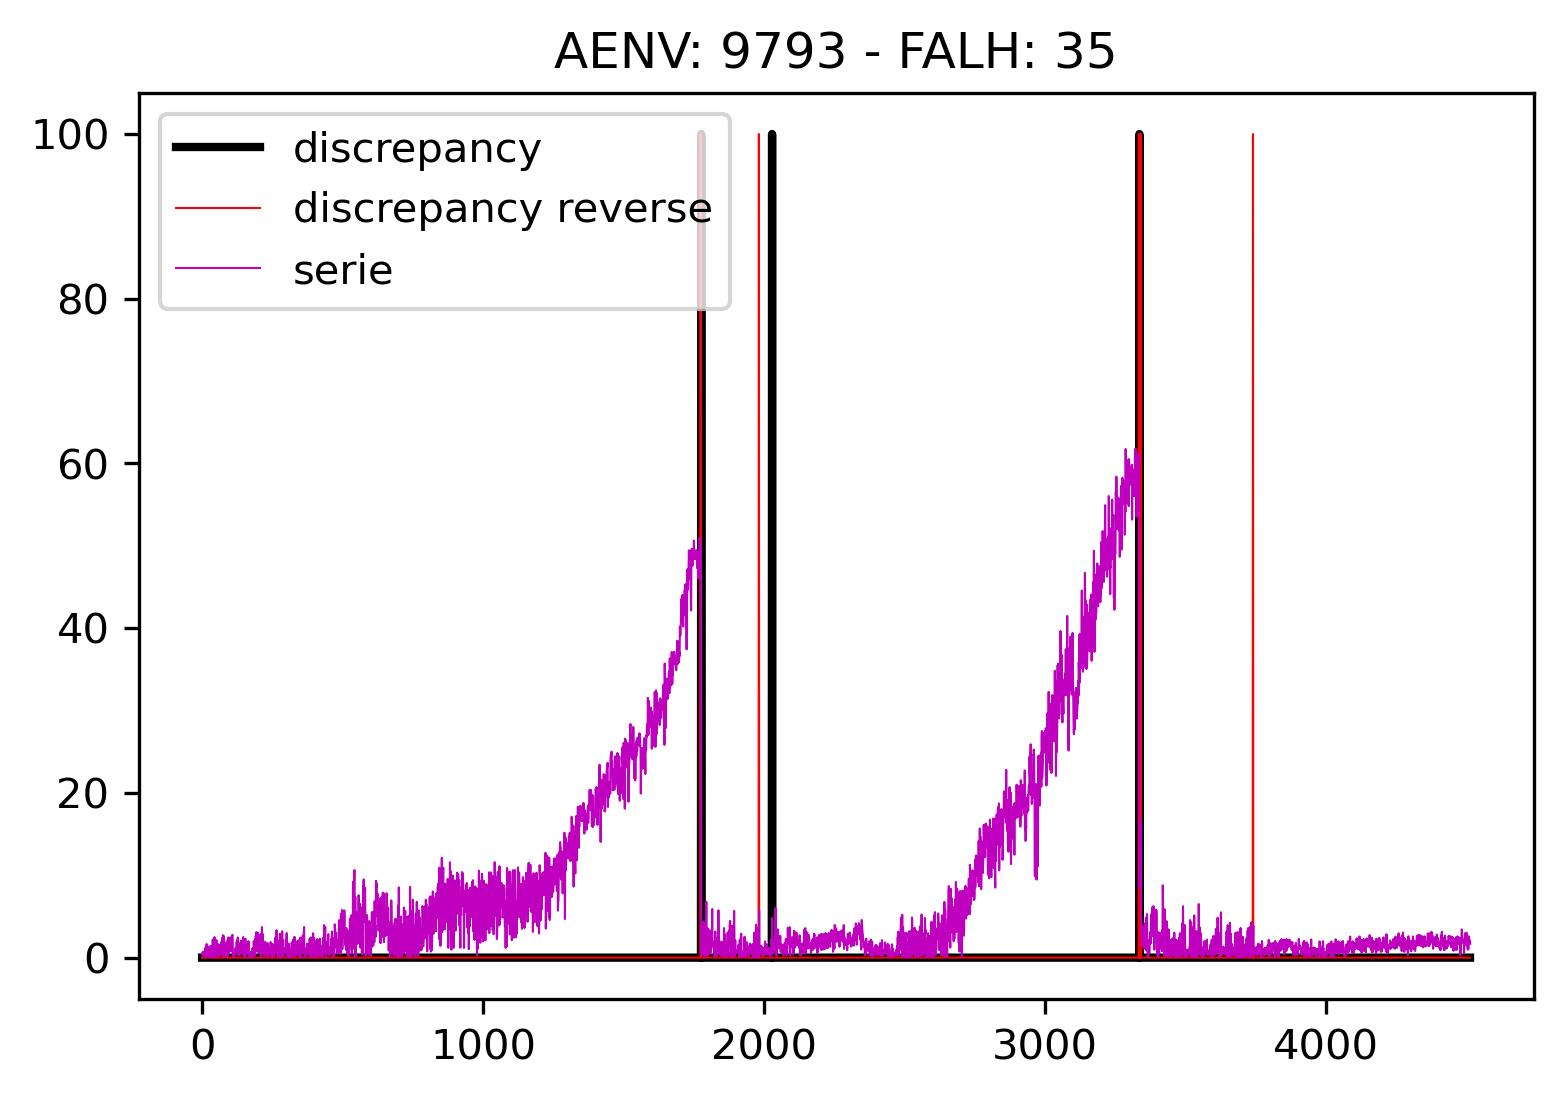

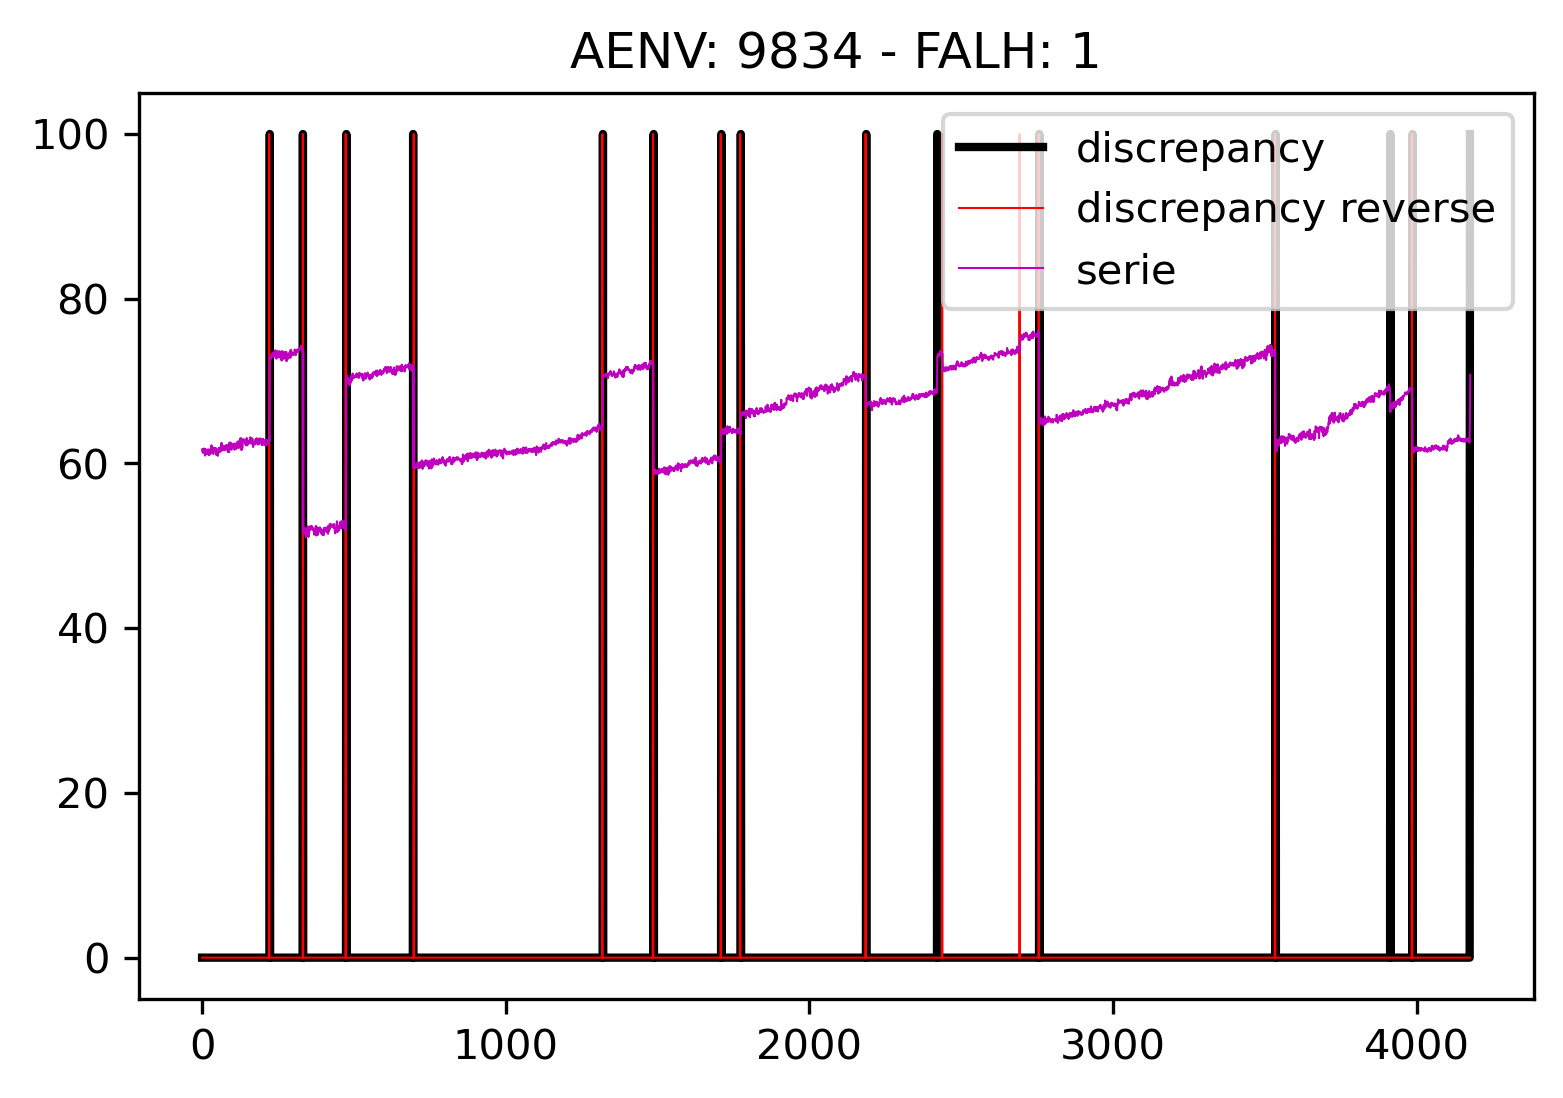

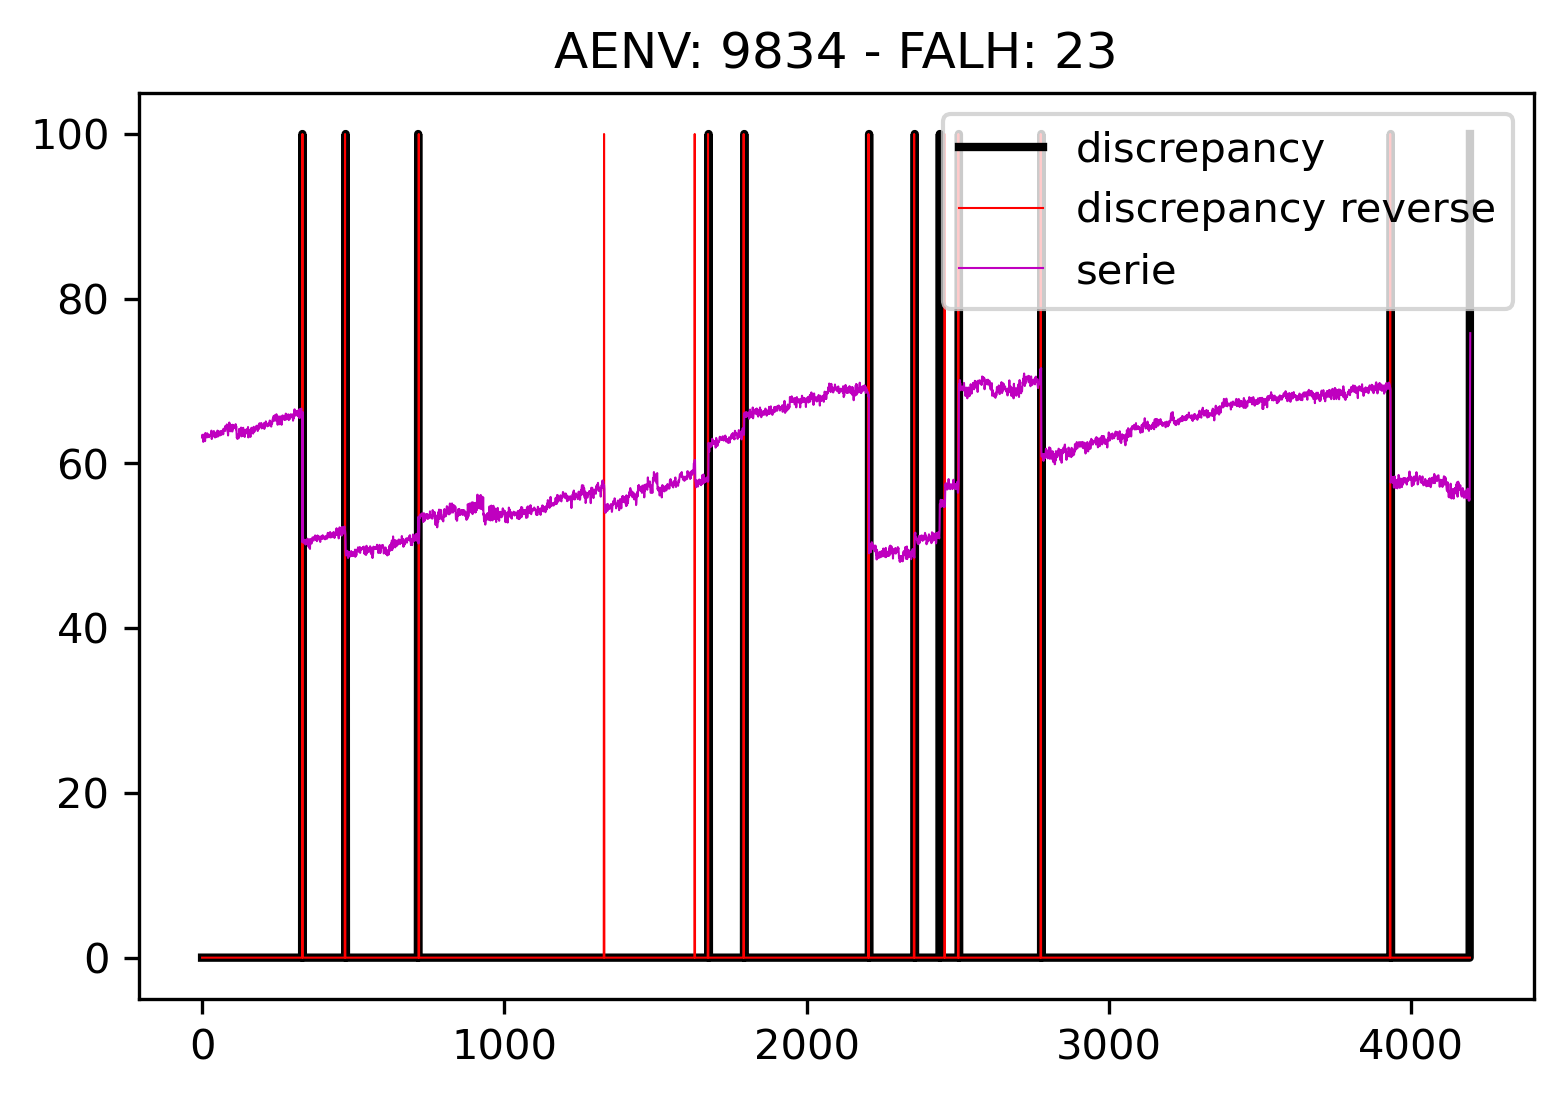

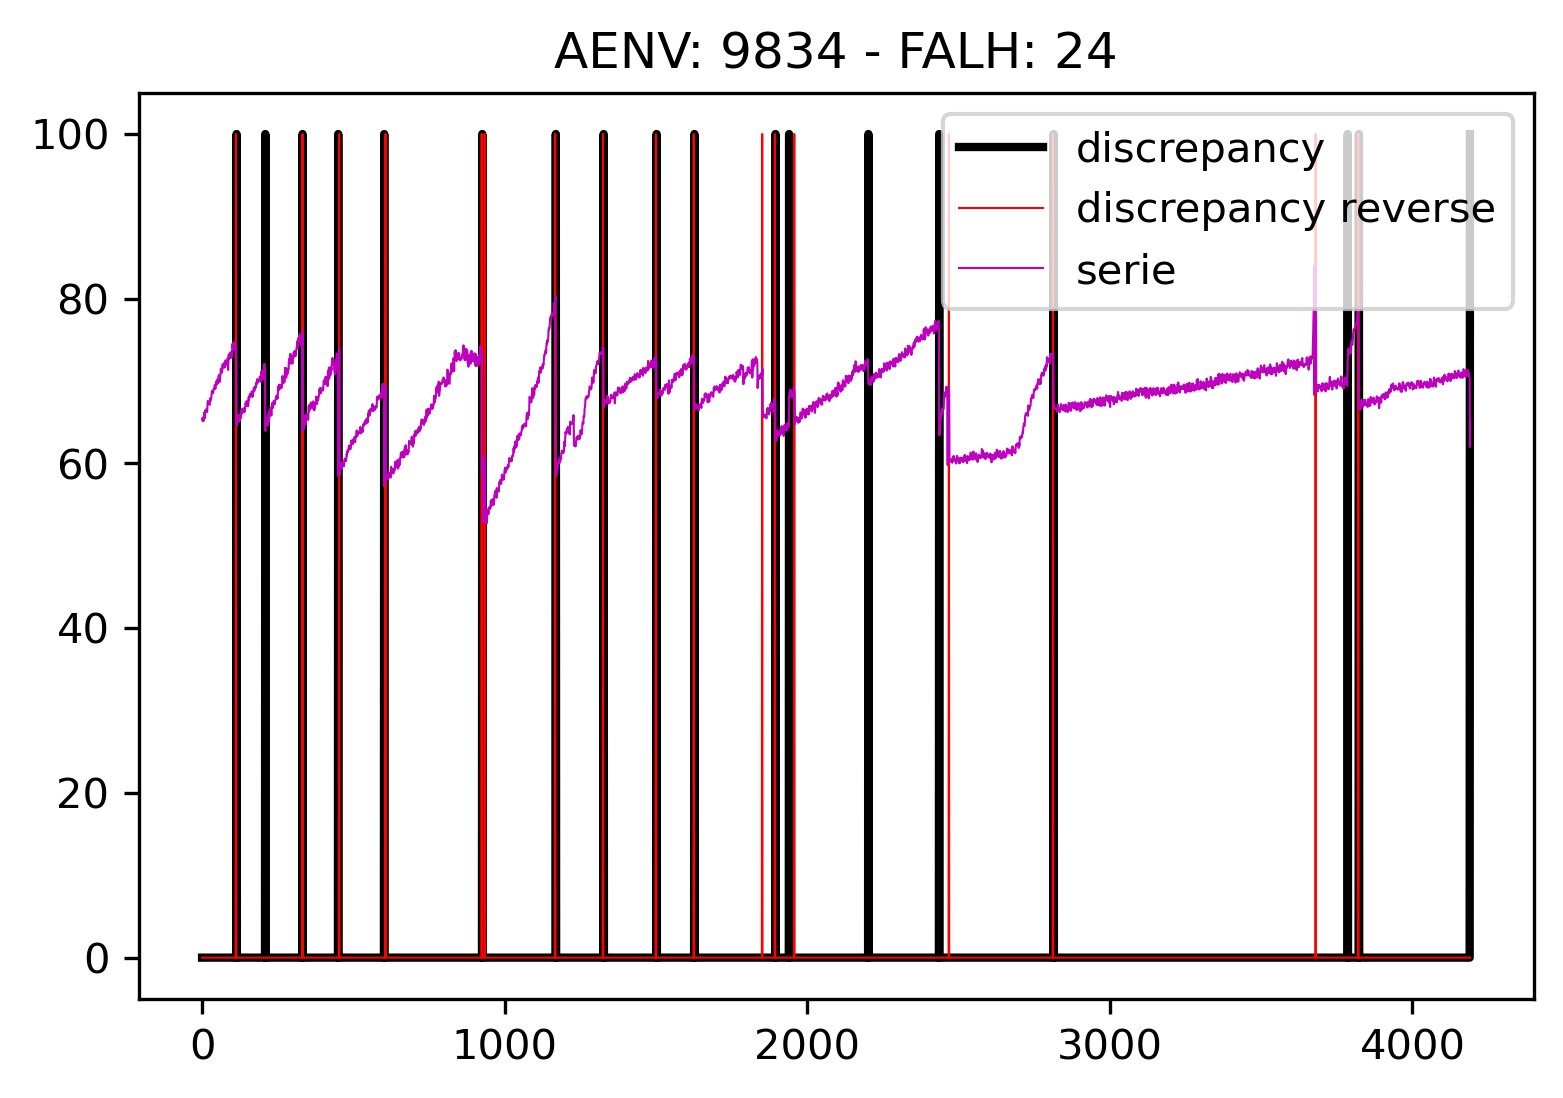

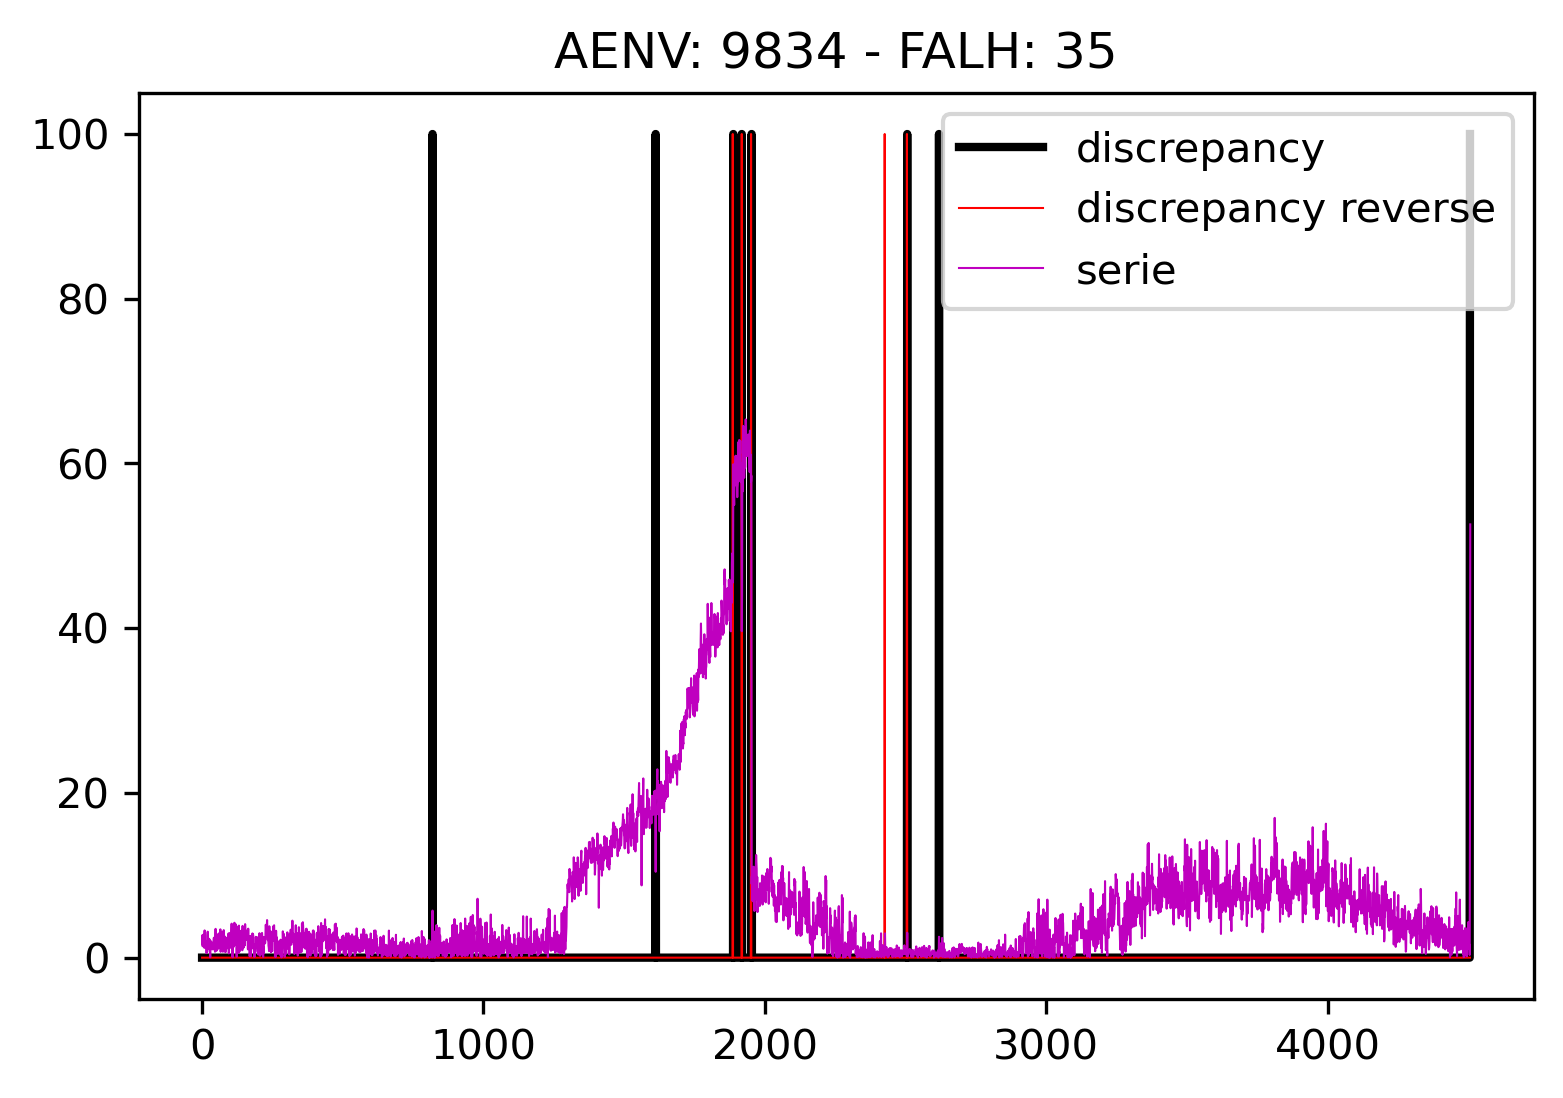

In [78]:
for i in aenv:
    for j in falh:
        serie=data_health[(data_health['COD_AENV']==i) & (data_health['COD_FALH']==j)]['VLR_DESG'].to_list()
        plt.figure(dpi=300)
        plt.plot(discrepancy(serie),color='k',linewidth=2)
        plt.plot(discrepancy(serie[::-1])[::-1],color='r',linewidth=0.5)
        plt.plot(serie,color='m',linewidth=0.5)
        plt.legend(['discrepancy','discrepancy reverse','serie'])
        plt.title('AENV: '+str(i)+' - FALH: '+str(j))

        